In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.ticker as ticker
from cycler import cycler
from scipy.optimize import curve_fit
plt.rc('text', usetex=True)
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
rcParams.update({'font.size': 14})
import matplotlib as mpl

In [2]:
# initial variables
materials_subgroups=[['gra_single','gra_bi', 'hbn_gra','mos_gra'],  ['hbn_single', 'hbn_bi', 'gra_hbn','mos_hbn'], ['mos_single', 'mos_bi','gra_mos','hbn_mos']]
labels_subgroups = (['$\\mathrm{graphene}$', '$\\mathrm{graphene}$\n$\mathrm{graphene}$', '$\\mathrm{graphene}$\n$\mathrm{hBN}$', '$\\mathrm{graphene}$\n$\mathrm{MoS_2}$'], 
        ['$\mathrm{hBN}$', '$\mathrm{hBN}$\n$\mathrm{hBN}$', '$\mathrm{hBN}$\n$\mathrm{graphene}$','$\mathrm{hBN}$\n$\mathrm{MoS_2}$'], 
        ['$\mathrm{MoS_2}$', '$\mathrm{MoS_2}$\n$\mathrm{MoS_2}$','$\mathrm{MoS_2}$\n$\mathrm{graphene}$','$\mathrm{MoS_2}$\n$\mathrm{hBN}$'])
colors_subgroups = [['dimgray','gray','darkgrey', 'lightgrey'],['firebrick', 'indianred', 'lightcoral','lightsalmon'], ['goldenrod','gold','lemonchiffon','yellow']]
materials = ['gra_single', 'gra_bi', 'hbn_gra', 'mos_gra', 'hbn_single', 'hbn_bi', 'gra_hbn','mos_hbn','mos_single','mos_bi','gra_mos','hbn_mos']
labels = ['bla','$\mathrm{GRA}$', '$\mathrm{GRA}$\n$\mathrm{GRA}$', '$\mathrm{GRA}$\n$\mathrm{hBN}$', '$\mathrm{GRA}$\n$\mathrm{MoS_2}$', '$\mathrm{hBN}$', '$\mathrm{hBN}$\n$\mathrm{hBN}$', '$\mathrm{hBN}$\n$\mathrm{GRA}$', '$\mathrm{hBN}$\n$\mathrm{MoS_2}$','$\mathrm{MoS_2}$', '$\mathrm{MoS_2}$\n$\mathrm{MoS_2}$','$\mathrm{MoS_2}$\n$\mathrm{GRA}$','$\mathrm{MoS_2}$\n$\mathrm{hBN}$' ]
labels_1row = ['$\mathrm{GRA}$', '$\mathrm{GRA}/\mathrm{GRA}$', '$\mathrm{GRA}/\mathrm{hBN}$', '$\mathrm{GRA}/\mathrm{MoS_2}$', '$\mathrm{hBN}$', '$\mathrm{hBN}/\mathrm{hBN}$', '$\mathrm{hBN}/\mathrm{GRA}$', '$\mathrm{hBN}/\mathrm{MoS_2}$','$\mathrm{MoS_2}$', '$\mathrm{MoS_2}/\mathrm{MoS_2}$','$\mathrm{MoS_2}/\mathrm{GRA}$','$\mathrm{MoS_2}/\mathrm{hBN}$' ]
labels_1row_sub = [['$\mathrm{GRA}$', '$\mathrm{GRA}/\mathrm{GRA}$', '$\mathrm{GRA}/\mathrm{hBN}$', '$\mathrm{GRA}/\mathrm{MoS_2}$'], ['$\mathrm{hBN}$', '$\mathrm{hBN}/\mathrm{hBN}$', '$\mathrm{hBN}/\mathrm{GRA}$', '$\mathrm{hBN}/\mathrm{MoS_2}$'],['$\mathrm{MoS_2}$', '$\mathrm{MoS_2}/\mathrm{MoS_2}$','$\mathrm{MoS_2}/\mathrm{GRA}$','$\mathrm{MoS_2}/\mathrm{hBN}$'] ]

colors = ['dimgray','gray','darkgrey', 'lightgrey',   'firebrick', 'indianred', 'lightcoral', 'lightsalmon','goldenrod','gold','lemonchiffon','yellow']
colors_reverse=['lightgrey','darkgrey','gray','dimgray','lightsalmon','lightcoral','indianred', 'firebrick','yellow','lemonchiffon','gold','goldenrod']

remove_conf = ['hbn_mos', 'mos_hbn']
materials_conf = [ele for ele in materials if ele not in remove_conf]
labels_conf = ['$\mathrm{GRA}$', '$\mathrm{GRA}$\n$\mathrm{GRA}$', '$\mathrm{GRA}$\n$\mathrm{hBN}$', '$\mathrm{GRA}$\n$\mathrm{MoS_2}$', '$\mathrm{hBN}$', '$\mathrm{hBN}$\n$\mathrm{hBN}$', '$\mathrm{hBN}$\n$\mathrm{GRA}$','$\mathrm{MoS_2}$', '$\mathrm{MoS_2}$\n$\mathrm{MoS_2}$','$\mathrm{MoS_2}$\n$\mathrm{GRA}$' ]
materials_subgroups_conf=[['gra_single','gra_bi', 'hbn_gra','mos_gra'],  ['hbn_single', 'hbn_bi', 'gra_hbn'], ['mos_single', 'mos_bi','gra_mos']]
labels_subgroups_conf = (['$\mathrm{graphene}$', '$\mathrm{graphene}$\n$\mathrm{graphene}$', '$\mathrm{graphene}$\n$\mathrm{hBN}$', '$\mathrm{graphene}$\n$\mathrm{MoS_2}$'], 
        ['$\mathrm{hBN}$', '$\mathrm{hBN}$\n$\mathrm{hBN}$', '$\mathrm{hBN}$\n$\mathrm{graphene}$'], 
        ['$\mathrm{MoS_2}$', '$\mathrm{MoS_2}$\n$\mathrm{MoS_2}$','$\mathrm{MoS_2}$\n$\mathrm{graphene}$'])
kBT = 0.02843719976 # for 330 K [eV]
lattice_subgroups=[[2.468, 2.468, 2.4915, 2.4886], [2.515, 2.515, 2.4915, 2.4886], [3.179, 3.179, 3.111075, 3.11075]]
lattice_subgroups_conf=[[2.468, 2.468, 2.4915, 2.4886], [2.515, 2.515, 2.4915], [3.179, 3.179, 3.111075]]
########## s_dens_bulk 
number_dens_water = 997048*6.022e23/18
beta = 0.01805 # ml H2 / ml H2O
s_dens_bulk = number_dens_water * beta
######################
cavities = ('1.50' ,'1.75', '2.00', '2.25', '2.50','2.75', '3.00', '3.25')
angstrom_to_m = 1e-10
m_to_angstrom = 1e10
eta = 9e-4 # Pa*s
prefactor = 1e-8*1.602e-19 # [\mu m^2*mol/s]
# areas
gra_single_area = 24.68*25.648*2
hbn_single_area = 25.15*26.136*2
mos_single_area = 25.432*22.0247*2
gra_hbn_area = 24.915*25.892*2
gra_mos_area = 24.886*21.552*2

# Define functions

### friction

In [3]:
# objective function
def fit_line(x, a, b):
	return a * x + b
# objective function
def fit_line1par(x, a):
	return a * x 
# objective function
def fit_exp(x, a, b):
	return a*x**b

def fit_arccos(kw, a, b):
	return a*np.arccos(1/kw**2-1) + b

def extract_tm(lam,lam0,t1):
    tm = t1/2 * (1 - lam/lam0)
    return tm

# objective function
def fit_friction(t, lam0, t1, t2):
    return lam0 * (np.exp(-t/t1) - np.exp(-t/t2))

def read_fric(path):
    df = pd.read_csv(path, header = 0, sep=r'\s+')
    scale=1e4
    acf_time = df.iloc[:,0]
    lambda_mean = df.iloc[:,5]
    lambda_err_mean = df.iloc[:,6]
    popt, pcov = curve_fit(fit_friction, acf_time, lambda_mean, p0 = [150000, 100000,100], bounds=(0.5, [max(lambda_mean)*10, 1e10, 2000]))
    popt_err, pcov = curve_fit(fit_friction, acf_time, lambda_mean-lambda_err_mean,  p0 = [150000, 100000,100], bounds=(0.5, [max(lambda_mean)*10, 1e10, 2000]))
    lambda_fit = fit_friction(acf_time, *popt)
    lambda_fit_err = fit_friction(acf_time, *popt_err)
    lambda_coef_fit = popt[0] * (1-popt[2]/popt[1])/(1+popt[2]/popt[1])
    lambda_coef_fit_err = lambda_coef_fit - (popt_err[0] * (1-popt_err[2]/popt_err[1])/(1+popt_err[2]/popt_err[1]))
    tm = extract_tm(lambda_coef_fit,popt[0],popt[1])
    u = popt[2]/popt[1]
    return acf_time, lambda_mean/scale, lambda_err_mean/scale, popt, popt_err, lambda_coef_fit/scale, lambda_coef_fit_err/scale, lambda_fit/scale, lambda_fit_err/scale,tm, u

### ddo

In [4]:
def calc_ddo_vs(material, llambda, llambda_err, eta, kBT, dz, z_array_ener, DeltaG, r_cavity, z_array_dens, w_dens, w_dens_bulk, s_dens_bulk, split):
    ''' :param llambda:     array, friction of water on a given material
        :param eta:         array, viscosity of water in bulk region
        :param dz:          float, bin size
        :param z_array:     array, from 0A to "cell size" A, in a bin size
        :param r_cavity:    float, radius of a cavity
        :param DeltaG:      array, free energy of hydration of a hydrophobic particle
        :param conc_bulk:   float, concentration of a hydrophobic particle in bulk
        :param w_dens:      array, water density profile
        :param w_dens_bulk: float, density of water in the bilk region
        :param s_dens_bulk: float, solute density in the bulk region

        :return ddo:        float, Diffusio-osmotic coeficient of fluid
        :return vs:         float, Diffusio-osmotic velocity of fluid  
        :return Gamma_w:    float, Gamma parameter of solvent (water)
        :return Gamma_s:    float, Gamma parameter of solute 
        :return L_w:        float, L parameter of water
        :return L_s:        float, L parameter of solute           
    '''
    b=eta/llambda * m_to_angstrom
    # if r_cavity_m > 0.0 then the data WITHOUT the surface is computed correctly
    # if r_cavity_m == 0.0 then the data WITH the surface is computed correctly
    if r_cavity > 0.0:
        DeltaG[z_array_ener < r_cavity] = np.abs(np.ones(len(DeltaG[z_array_ener < r_cavity])))*1e10

    Gamma_w = dz * np.trapezoid( w_dens / w_dens_bulk - 1.) 
    if split == True:
        term_Gamma_s = r_cavity
        term_Gamma_s_L_s = (r_cavity**2)/2
        term_whole = r_cavity*b -0.5*r_cavity**2
    else:
        term_Gamma_s = term_Gamma_s_L_s = term_whole = 0
    Gamma_s = dz * np.trapezoid( np.exp( -DeltaG  ) -1. ) - term_Gamma_s
    Gamma_w_L_w = dz * np.trapezoid( z_array_dens * ( w_dens / w_dens_bulk -1. ) ) 
    Gamma_s_L_s = dz * np.trapezoid( z_array_ener * ( np.exp( -DeltaG  ) -1.) )- term_Gamma_s_L_s
    L_w = Gamma_w_L_w / Gamma_w
    L_s = Gamma_s_L_s / Gamma_s
    ddo = kBT*s_dens_bulk/eta*(Gamma_s_L_s - Gamma_w_L_w + b * (Gamma_s - Gamma_w) )*prefactor
    ddo_err = ddo * llambda_err # relative error from the friction coeeficient
    ddo_noslip = kBT*s_dens_bulk/eta*(Gamma_s_L_s - Gamma_w_L_w  )*prefactor
    vs = float((-kBT/eta)*(Gamma_s_L_s - Gamma_w_L_w + b * (Gamma_s - Gamma_w) ))#*10**(12) # 10^12 to micrometers
    # correctly writing the whole integral 
    if r_cavity == 0.0:
        ddo_whole_int = (kBT/eta * dz * s_dens_bulk* np.trapezoid((z_array_ener + b) * ( np.exp(-DeltaG) - w_dens/w_dens_bulk ))) * prefactor
    elif r_cavity > 0.0:
        ddo_whole_int = dz *np.trapezoid( (z_array_ener +b)*(np.exp(-DeltaG) - 1) ) - term_whole
        ddo_whole_int -= dz * np.trapezoid((w_dens/w_dens_bulk -1.)*(b+ z_array_dens))
        ddo_whole_int *= kBT/eta * s_dens_bulk*prefactor
    return ddo_whole_int, ddo, ddo_err, ddo_noslip, vs, Gamma_w, Gamma_s, L_w, L_s, b

def calc_error_std3(run1, run2, run3, nruns):
    run_mean = (run1 + run2 + run3) / nruns
    diff = pd.DataFrame(((run1 - run_mean)**2, (run2 - run_mean)**2, (run3 - run_mean)**2)).T
    std = np.sqrt(np.sum(diff, axis=1)) / np.sqrt(nruns-1)
    err = std / np.sqrt(nruns)
    return run_mean, err

def calc_errors_df_ddo3(df1, df2, df3, ndf = 3):
    df_new = pd.DataFrame((df1['Material'], df1['Radius'])).T
    idx = 2
    for column in df1.columns:
        if column != 'Material' and column != 'Radius' and column != '-ddo_err_slip':
            mean, err_std = calc_error_std3(df1[column], df2[column], df3[column], ndf)
            err_tot = err_std
            if column == '-ddo':
                err_rel = np.sqrt(((df1['-ddo_err_slip'] / df1['-ddo'])**2 + (df2['-ddo_err_slip'] /df2['-ddo'])**2  + (df3['-ddo_err_slip'] /  df3['-ddo'])**2)) / ndf
                err_tot = np.sqrt((err_rel * mean)**2 + err_std**2)
            df_new.insert(idx, column, mean)
            df_new.insert(idx+1, '{} sig'.format(column), err_tot, allow_duplicates=True)
            idx += 2
    return df_new

def calc_error_std2(run1, run2, nruns):
    run_mean = (run1 + run2 ) / nruns
    diff = pd.DataFrame(((run1 - run_mean)**2, (run2 - run_mean)**2)).T
    std = np.sqrt(np.sum(diff, axis=1)) / np.sqrt(nruns-1)
    err = std / np.sqrt(nruns)
    return run_mean, err

def calc_errors_df_ddo2(df1, df2, ndf = 2):
    df_new = pd.DataFrame((df1['Material'], df1['Radius'])).T
    idx = 2
    for column in df1.columns:
        if column != 'Material' and column != 'Radius' and column != '-ddo_err_slip':
            mean, err_std = calc_error_std2(df1[column], df2[column], ndf)
            err_tot = err_std
            if column == '-ddo':
                err_rel = np.sqrt(((df1['-ddo_err_slip'] / df1['-ddo'])**2 + (df2['-ddo_err_slip'] /df2['-ddo'])**2 )) / ndf
                err_tot = np.sqrt((err_rel * mean)**2 + err_std**2)
            df_new.insert(idx, column, mean)
            df_new.insert(idx+1, '{} sig'.format(column), err_tot, allow_duplicates=True)
            idx += 2
    return df_new

def deltaG_hydrophobic(df_free_ener, column, start_z, end_z, free_ener_bulk_mean=0):
    # find bulk region 
    if free_ener_bulk_mean == 0:
        free_ener_bulk_mean = df_free_ener[(df_free_ener["z"] > start_z) & (df_free_ener["z"] < end_z)][column].mean()
    else:
        free_ener_bulk_mean = free_ener_bulk_mean
    # decide if divide or subtract based on the initial quantity
    if column != 'P0' and column != 'P0_surf':
        df_free_ener[column] = df_free_ener[column] - free_ener_bulk_mean
    else:
        df_free_ener[column] = df_free_ener[column] / free_ener_bulk_mean
    return df_free_ener, free_ener_bulk_mean

def water_density(df_density, start_z, end_z):
    dens_bulk = df_density[(df_density["z"] > start_z) & (df_density["z"] < end_z)]['density'].mean()
    return dens_bulk

def to_dict(material, returned_dict, temporary_storage):
    if material in returned_dict:
        returned_dict[material] |= temporary_storage # append
    else:
        returned_dict[material] = temporary_storage # create new
    return returned_dict

def to_df(property, returned_dictionary):
    if property == 'ddo':
        dict_of_df = {k: pd.DataFrame(v) for k,v in returned_dictionary.items()}
        returned_df = pd.concat(dict_of_df, axis=1).rename(index = {0: "ddo_whole", 1: "-ddo", 2:"-ddo_err_slip", 3:"-ddo_noslip", 4:"V_s",5:"Gamma_w", 6:"Gamma_s",7:"L_w", 8:"L_s", 9 :"b" }).T # all lengths are in Angstrom 
        returned_df = returned_df.reset_index().rename(columns = {'level_0':'Material', 'level_1':'Radius'} )   
    if property == 'free_ener':
        dict_of_df = {k: pd.DataFrame(v) for k,v in returned_dictionary.items()}
        returned_df = pd.concat(dict_of_df, axis=1).rename(index = {0: "z", 1:"DeltaG" }).T  
    if property == 'dens':
        dict_of_df = {k: pd.DataFrame(v) for k,v in returned_dictionary.items()}
        returned_df = pd.concat(dict_of_df, axis=1).rename(index = {0: "z", 1:"Density" }).T
        returned_df = returned_df.reset_index().rename(columns = {'level_0':'Material'} ).drop(columns="level_1")
    return returned_df

def wca(mu_min, mu_bulk, costheta0):
    m = mu_bulk/2/(1+costheta0)
    costheta = mu_min/m + costheta0
    return np.rad2deg(np.arccos(costheta))

# Friction

Text(0, 0.5, '$\\mathrm{friction\\hspace{0.1cm}coefficient}[\\times 10^4 \\mathrm{Pa\\cdot s/m}]$')

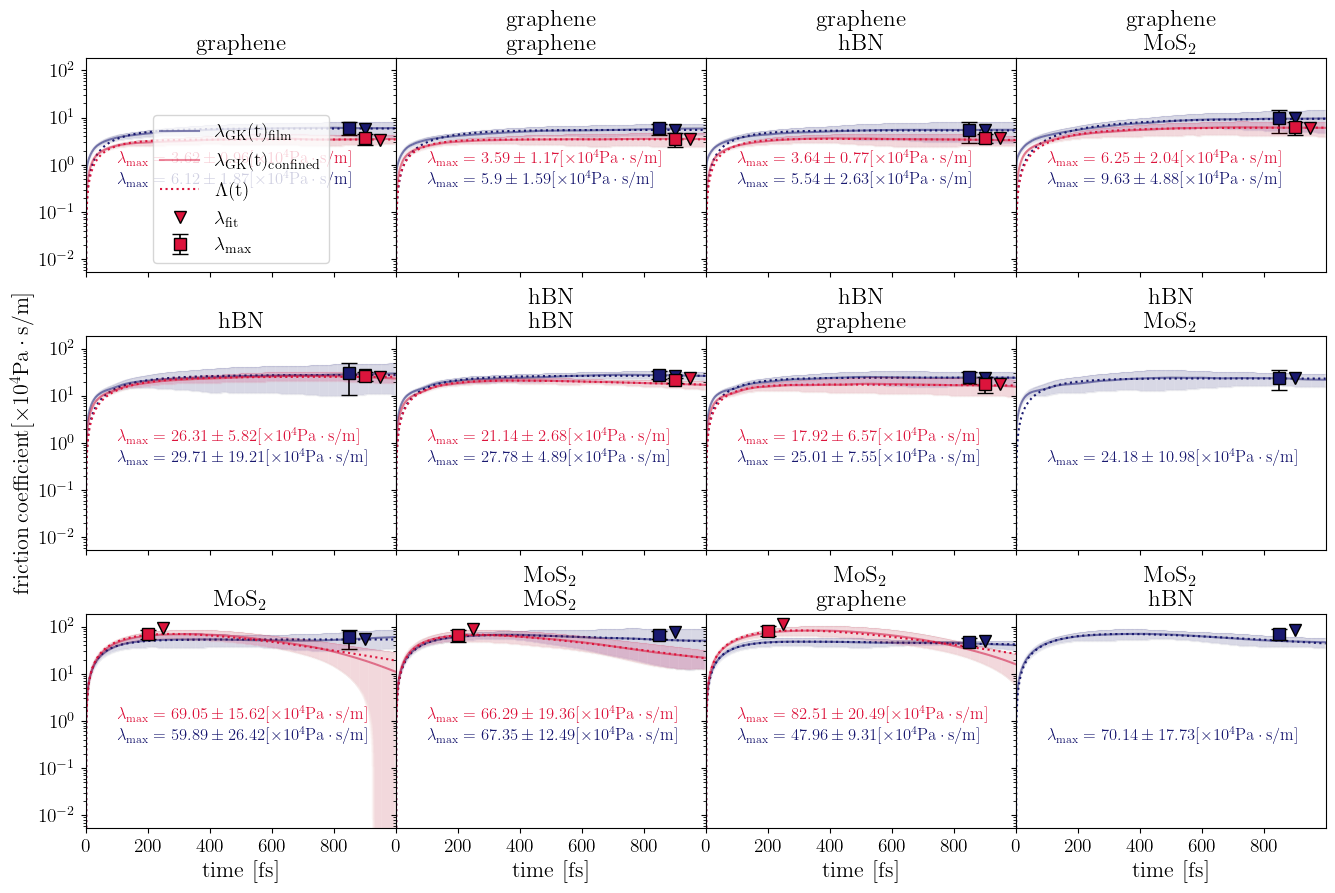

In [5]:
returned_lambda_bulk = {}; returned_lambda_bulk_err = {}; returned_lambda_conf = {}; returned_lambda_conf_err = {}
returned_lambdamax_bulk = {}; returned_lambdamax_bulk_err = {}; returned_lambdamax_conf = {}; returned_lambdamax_conf_err = {}
returned_lambdamax_mean = {}; returned_lambdamax_mean_err = {}; returned_lambdamax_mean_relative_err = {}
returned_u_bulk = {}; returned_u_conf = {}
fig, ax = plt.subplots(figsize = (16,10), ncols=4, nrows = 3,sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.3, wspace=0)
scale=1e4
for idx_t,(tm,tl) in enumerate(zip(materials_subgroups,labels_subgroups)):
    for idx_b, (m,l) in enumerate(zip(tm,tl)):
        acf_time, lambda_mean, lambda_err_mean, popt, popt_err, lambda_coef_fit, lambda_coef_fit_err, lambda_fit, lambda_fit_err,tm, u = read_fric('friction/films/mean_error_{}.dat'.format(m))
        ax[idx_t,idx_b].plot(acf_time,lambda_fit , color = 'midnightblue', ls=':')
        ax[idx_t,idx_b].plot(acf_time,lambda_mean,markersize = 1,color='midnightblue',alpha = 0.5,  label=r'$\mathrm{\lambda_{\mathrm{GK}}(t)_{film}}$')
        ax[idx_t,idx_b].errorbar(acf_time,lambda_mean, yerr = lambda_err_mean,markersize = 1,color='midnightblue',ecolor='midnightblue',elinewidth=3,capsize=1, alpha = 0.01, errorevery=1)
        ax[idx_t, idx_b].text(100,0.4,r'$\lambda_{\mathrm{max}} = %s \pm %s [\times 10^4 \mathrm{Pa\cdot s/m}]$'%(round(lambda_mean.max(),2), round(lambda_err_mean.iloc[lambda_mean.idxmax()],2)), c = 'midnightblue',fontsize=12)
        ax[idx_t,idx_b].set_title(l)
        acf_extract = 900
        eb_fit = ax[idx_t,idx_b].errorbar(acf_extract,lambda_coef_fit,c='black',capsize=6,fmt='v', ecolor='black', elinewidth=1.2, mfc='midnightblue', ms=8,fillstyle=None)
        ax[idx_t,idx_b].errorbar(acf_extract-50,lambda_mean.max(), yerr = lambda_err_mean.iloc[lambda_mean.idxmax()],c='black',capsize=6,fmt='s', ecolor='black', elinewidth=1.2, mfc='midnightblue', ms=8)            
        returned_lambda_bulk[m] = lambda_coef_fit*scale; returned_lambda_bulk_err[m] = (lambda_coef_fit_err*scale); returned_u_bulk[m] = u
        returned_lambdamax_bulk[m] = lambda_mean.max()*scale; returned_lambdamax_bulk_err[m] = (lambda_err_mean.iloc[lambda_mean.idxmax()])*scale
        returned_lambdamax_mean[m] = returned_lambdamax_bulk[m]; returned_lambdamax_mean_err[m] = returned_lambdamax_bulk_err[m]
        returned_lambdamax_mean_relative_err[m] = returned_lambdamax_mean_err[m] / returned_lambdamax_mean[m]
        if m != 'mos_hbn' and m != 'hbn_mos':
            acf_extract = 950
            if idx_t == 2:
                acf_extract = 250
            acf_time, lambda_mean, lambda_err_mean, popt, popt_err, lambda_coef_fit, lambda_coef_fit_err, lambda_fit,lambda_fit_err,tm, u = read_fric('friction/confined/mean_error_{}.dat'.format(m,m))
            eb_fit = ax[idx_t,idx_b].errorbar(acf_extract,lambda_coef_fit,c='black',capsize=6,fmt='v', ecolor='black', elinewidth=1.2, mfc='crimson', ms=8,label=r'$\mathrm{\lambda_{\mathrm{fit}}}$')
            ax[idx_t,idx_b].plot(acf_time,lambda_mean,markersize = 1,color='crimson',alpha = 0.5,  label=r'$\mathrm{\lambda_{\mathrm{GK}}(t)_{confined}}$')
            ax[idx_t,idx_b].errorbar(acf_time,lambda_mean, yerr = lambda_err_mean,markersize = 1,color='crimson',ecolor='crimson',elinewidth=3,capsize=1, alpha = 0.01, errorevery=1)
            ax[idx_t,idx_b].plot(acf_time, lambda_fit, color = 'crimson', ls=':',label=r'$\mathrm{\Lambda(t)}$')
            ax[idx_t,idx_b].set_yscale("log")
            ax[2, idx_b].set_xlabel(r'$\mathrm{time}\hspace{0.2cm}\mathrm{[fs]}$',fontsize=16)
            ax[idx_t, idx_b].set_xlim([-1,999])
            ax[idx_t, idx_b].text(100,1.1,r'$\lambda_{\mathrm{max}} = %s \pm %s [\times 10^4 \mathrm{Pa\cdot s/m}]$'%(round(lambda_mean.max(),2),round(lambda_err_mean.iloc[lambda_mean.idxmax()],2)), c = 'crimson',fontsize=12)
            ax[idx_t,idx_b].errorbar(acf_extract-50,lambda_mean.max(), yerr = lambda_err_mean.iloc[lambda_mean.idxmax()],c='black',capsize=6,fmt='s', ecolor='black', elinewidth=1.2, mfc='crimson', ms=8,label=r'$\mathrm{\lambda_{\mathrm{max}}}$')            
            returned_lambda_conf[m] = lambda_coef_fit*scale; returned_lambda_conf_err[m] = (lambda_coef_fit_err*scale); returned_u_conf[m] = u
            returned_lambdamax_conf[m] = lambda_mean.max()*scale; returned_lambdamax_conf_err[m] = (lambda_err_mean.iloc[lambda_mean.idxmax()])*scale
            returned_lambdamax_mean[m] = np.mean((returned_lambdamax_bulk[m], returned_lambdamax_conf[m])); returned_lambdamax_mean_err[m] = np.sqrt(returned_lambdamax_bulk_err[m]**2 + returned_lambdamax_conf_err[m]**2)/2
            returned_lambdamax_mean_relative_err[m] = returned_lambdamax_mean_err[m] / returned_lambdamax_mean[m]
ax[0,0].legend(loc='best', fontsize=14)
ax[1,0].set_ylabel(r'$\mathrm{friction\hspace{0.1cm}coefficient}[\times 10^4 \mathrm{Pa\cdot s/m}]$',fontsize=16)

# Water density profiles

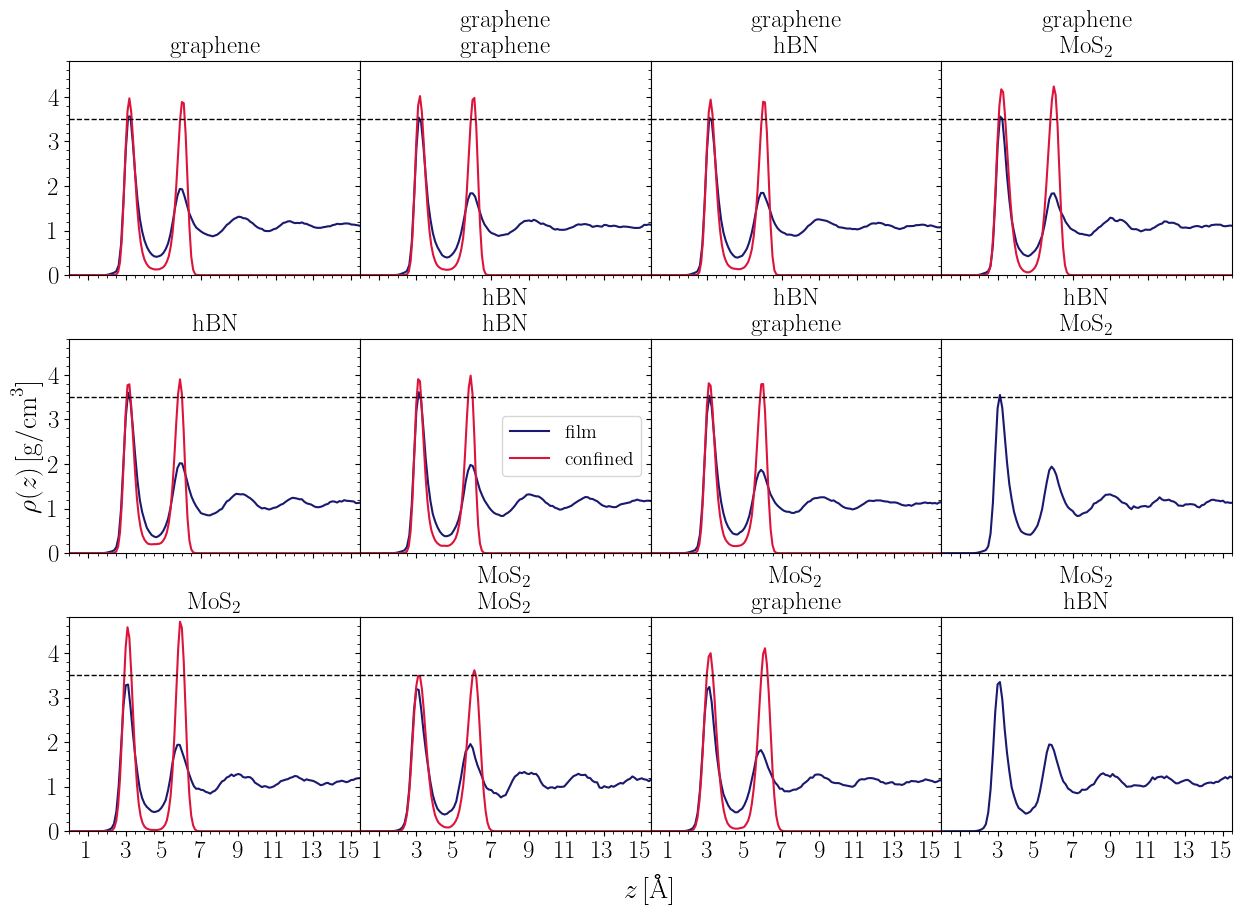

In [6]:
plt.rc('text', usetex=True)
r = 3
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3, wspace=0)

for row_idx, (material_line, label_line) in enumerate(zip(materials_subgroups, labels_subgroups)):
    for col_idx, (material, label) in enumerate(zip(material_line, label_line)):
        df_density = pd.read_csv('density-profiles/films/{}/density.csv'.format(material), header=0)
        z = df_density.iloc[:, 1]
        dens = df_density.iloc[:, 2]
        ax[row_idx, col_idx].plot(z, dens, color='midnightblue', label='$\mathrm{film}$')
        if material != 'mos_hbn' and material != 'hbn_mos':
            df_density = pd.read_csv('density-profiles/confined/{}/density.dat'.format(material), header=0, sep='\s+')
            z = df_density.iloc[:, 0]
            dens = df_density.iloc[:, 1]
            ax[row_idx, col_idx].plot(z, dens, color='crimson', label='$\mathrm{confined}$')
        ax[row_idx, col_idx].set_title(label, fontsize=18)
        ax[row_idx, col_idx].axis([1, 14.99, 0, 4.5])
        ax[row_idx, col_idx].tick_params(labelsize=18)
        ax[row_idx, col_idx].axhline(y=3.5, color='black', linestyle='dashed', lw=1, alpha=1)
        ax[row_idx, col_idx].set_yticks(np.arange(0, 5, 1))
        ax[row_idx, col_idx].set_yticks(np.arange(0, 5, 0.2), minor=True)
        ax[row_idx, col_idx].set_xticks(np.arange(1, 16, 2))
        ax[row_idx, col_idx].set_xticks(np.arange(0, 16, 0.5), minor=True)

ax[1, 0].set_ylabel(r'$\rho(z)\hspace{0.1cm}[\mathrm{g/cm}^3]$', fontsize=20)
ax[2, 1].set_xlabel(r'$z \hspace{0.1cm}[\mathrm{\AA}]$', fontsize=20)
ax[2, 1].xaxis.set_label_coords(1, -.2)

# legend
ax[1, 1].legend(loc='best')

# DDO

In [7]:
returned_enerG = {}; returned_enerGS = {}; returned_enerP = {}; returned_enerPS = {}
#******************
returned_ddoG = {}; returned_ddoGS = {}; returned_ddoP = {}; returned_ddoPS = {}
#******************
returned_dens = {}
#*******************
columns = ['free_energy_gauss', 'free_energy_gauss_surf', 'free_energy_probability', 'free_energy_probability_surf']
zero_height=0.0
split=False
start_zs = 14
end_zs=16
start_zw = 14
end_zw = 17
# mu_bulk = collections.defaultdict(list)
materials_wca = {}
costheta0=np.cos(np.deg2rad(45)) #if theta0 = 45 degrees
for material, (key1, val1), (key2, val2) in zip( materials, returned_lambdamax_mean.items(), returned_lambdamax_mean_relative_err.items()): 
    delta_mu_wca = {}
    ''' material = key1 = key2 = name of the material in contact with water
        val1 = friction for every system
        val2 = relative error from friction on every system '''
    '''_________________FIRST PART ________________
        df = document with water density profile 
        variables to keep: '''
    df_density = pd.read_csv('density-profiles/films/{}/density.csv'.format(material), header = 0, na_values = [np.nan, np.inf]).drop(columns="Unnamed: 0")
    water_dens_bulk = water_density(df_density, start_zw, end_zw)
    temp = {'dummy': (df_density["z"].values, df_density["density"].values)}
    returned_dens[material] = temp # create new
    for idx, column in enumerate(columns):
        '''_________________SECOND PART ________________ 
            df = document with free energies of hydration of a hydrophobic particle 
            r_cavity = radius of the hydrophobic particle
            variables to keep: z_array_ener, DeltaG, dz, r_cavity_m '''
        for r_str in cavities:
            r_float = float(r_str)
            df_free_ener_abs = pd.read_csv('solvation-free-energy/films/{}/free_energy1_r-{}.csv'.format(material, r_str), header=0,na_values = [np.nan, np.inf]).drop(columns="Unnamed: 0").replace(np.nan, np.inf)
            dz = (df_free_ener_abs["z"][1] - df_free_ener_abs["z"][0])   # 0.2 A
            df_free_ener, free_ener_bulk = deltaG_hydrophobic(df_free_ener_abs, column, start_zs, end_zs)
            temp_ener = {r_str:(df_free_ener["z"].values, df_free_ener[column].values)}
            '''_______________THIRD PART____________________
            use calc_ddo_vs_function to calculate all the transport properties'''
            if column == 'free_energy_gauss' or column == 'free_energy_probability' :
                replace_till = np.array(df_free_ener[df_free_ener['z'] <= r_float][column].index)[-1]
                df_free_ener.loc[df_free_ener['z'] <= r_float,column] = 100
            if column == 'free_energy_gauss_surf':
                replace_till = np.array(df_free_ener[df_free_ener['z'] < r_float][column].index)[-1]
                df_free_ener.loc[df_free_ener['z'] < r_float/2,column] = 100
            if column == 'free_energy_gauss_surf' or column == 'free_energy_probability_surf':
                r_float = 0.
            # df_density["density"].iloc[0]=0. # deprecated in pandas 3.0
            df_density.loc[0, "density"] = 0 # new way
            # truncating the array from 0 to 15 A
            if split == True:
                condition_trunc_ener = (df_free_ener['z'] - r_float >= zero_height) & (df_free_ener['z'] < end_zs)
            else:
                condition_trunc_ener = (df_free_ener['z']  < end_zs)
            if column == columns[2]  and  float(r_str)< 3.1:
                delta_mu_wca[r_str] = wca( mu_min=df_free_ener[column].iloc[:60].min(), mu_bulk=free_ener_bulk,costheta0=costheta0)
            condition_trunc_dens = (df_density['z']  < end_zs)
            z_array_free_ener_trunc = df_free_ener[condition_trunc_ener]["z"].values
            free_ener_trunc = df_free_ener[condition_trunc_ener][column].values
            z_array_dens_trunc = df_density[condition_trunc_dens]["z"].values
            dens_trunc = df_density[condition_trunc_dens]["density"].values
            # passing all the variables to the ddo function
            ddo_full, ddo, ddo_err, ddo_noslip, vs, Gamma_w, Gamma_s, L_w, L_s, b = calc_ddo_vs(material, val1,val2, eta, kBT, dz, z_array_free_ener_trunc, free_ener_trunc , r_float, z_array_dens_trunc , dens_trunc, water_dens_bulk, s_dens_bulk, split=split)
            temp_ddo = {r_str: (ddo_full, ddo, ddo_err,  ddo_noslip, vs, Gamma_w, Gamma_s, L_w, L_s, b)} 
            if idx == 0:
                returned_enerG = to_dict(material, returned_enerG, temp_ener)
                returned_ddoG = to_dict(material, returned_ddoG, temp_ddo)
            if idx == 1:
                returned_enerGS = to_dict(material, returned_enerGS, temp_ener)
                returned_ddoGS = to_dict(material, returned_ddoGS, temp_ddo)
            if idx == 2:
                returned_enerP = to_dict(material, returned_enerP, temp_ener)
                returned_ddoP = to_dict(material, returned_ddoP, temp_ddo)
            if idx == 3:
                returned_ddoPS = to_dict(material, returned_ddoPS, temp_ddo)
                returned_enerPS = to_dict(material, returned_enerPS, temp_ener)
    materials_wca[material] = delta_mu_wca
# DDO       
df_ddoG = to_df('ddo',returned_ddoG)
df_ddoGS = to_df('ddo',returned_ddoGS)
df_ddoP = to_df('ddo',returned_ddoP)
df_ddoPS = to_df('ddo',returned_ddoPS)

# FREE ENER
df_enerG = to_df('free_ener',returned_enerG)
df_enerGS = to_df('free_ener',returned_enerGS)
df_enerP = to_df('free_ener',returned_enerP)
df_enerPS = to_df('free_ener',returned_enerPS)

# DENSITY
df_dens = to_df('dens', returned_dens)

# WCA
df_wca_colP = pd.DataFrame(materials_wca)

/var/folders/0n/6bd9x6ns2qj413jttymq46yw0000gn/T/ipykernel_29382/981517054.py:136: RuntimeWarning: invalid value encountered in arccos
  return np.rad2deg(np.arccos(costheta))
/var/folders/0n/6bd9x6ns2qj413jttymq46yw0000gn/T/ipykernel_29382/981517054.py:136: RuntimeWarning: invalid value encountered in arccos
  return np.rad2deg(np.arccos(costheta))
/var/folders/0n/6bd9x6ns2qj413jttymq46yw0000gn/T/ipykernel_29382/981517054.py:136: RuntimeWarning: invalid value encountered in arccos
  return np.rad2deg(np.arccos(costheta))
/var/folders/0n/6bd9x6ns2qj413jttymq46yw0000gn/T/ipykernel_29382/981517054.py:136: RuntimeWarning: invalid value encountered in arccos
  return np.rad2deg(np.arccos(costheta))
/var/folders/0n/6bd9x6ns2qj413jttymq46yw0000gn/T/ipykernel_29382/981517054.py:136: RuntimeWarning: invalid value encountered in arccos
  return np.rad2deg(np.arccos(costheta))
/var/folders/0n/6bd9x6ns2qj413jttymq46yw0000gn/T/ipykernel_29382/981517054.py:136: RuntimeWarning: invalid value encount

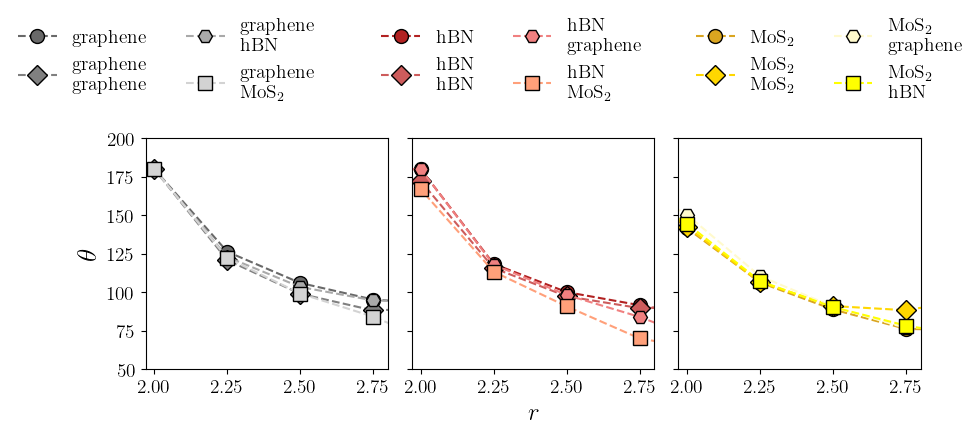

In [8]:
markers =['o', 'D', 'H', 's']

fig, ax=plt.subplots(figsize=(10,3), nrows=1,ncols=3, sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)
for idx, (mt,ct,lt) in enumerate(zip(materials_subgroups,colors_subgroups,labels_subgroups)):
    rs = pd.to_numeric(df_wca_colP.index)
    for (m,c,l,mark) in zip(mt,ct,lt,markers):
        thetas = df_wca_colP[m].replace(np.nan, 180).values
        ax[idx].plot(rs, thetas, marker=mark, ls='--',color=c, markeredgecolor='k', ms=10,label=l)

ax[0].legend(loc='upper left', bbox_to_anchor=(-0.6, 1.6),ncol=2, frameon=False)
ax[1].legend(loc='upper left', bbox_to_anchor=(-0.2, 1.6),ncol=2, frameon=False)
ax[2].legend(loc='upper left', bbox_to_anchor=(0, 1.6),ncol=2, frameon=False)

ax[0].set_ylabel(r'$\theta$',fontsize=20)
ax[1].set_xlabel(r'$r$',fontsize=18)
ax[2].axis([1.97,2.8,50,200])
# ax[2].yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax[2].yaxis.set_major_locator(ticker.MultipleLocator(25))
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(0.25))

Text(0.5, 1.0, '$r=2.75\\mathrm{\\AA}$')

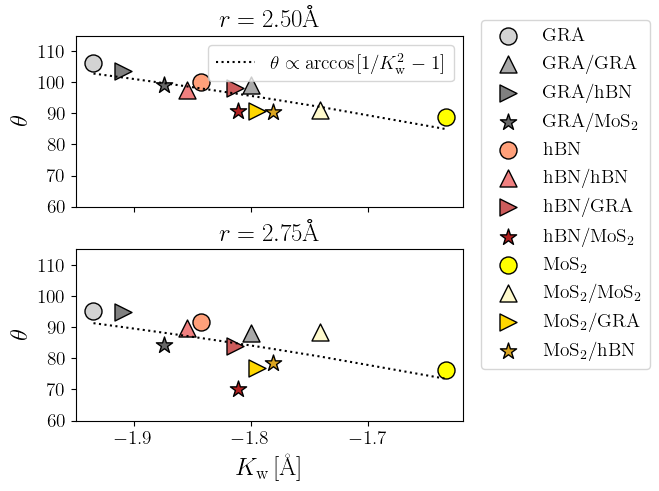

In [9]:
fig,ax = plt.subplots(nrows=2,ncols=1, figsize=(5,5), sharex=True, sharey=True)
plt.rc('text', usetex=True)
plt.subplots_adjust(wspace=0.1, hspace=0.25)
mat_names = ('GRA','GRA/GRA','GRA/hBN','GRA/MoS_2','hBN','hBN/hBN','hBN/GRA','hBN/MoS_2','MoS_2','MoS_2/MoS_2','MoS_2/GRA', 'MoS_2/hBN')
r_size = '2.00'
n = 0
labelfntsize=18
markers = ['o', '^', '>', '*']*3
for imat, (mat,c, l) in enumerate(zip(materials,colors_reverse, labels_1row)):
    kw = df_ddoP[(df_ddoP['Material'] == mat) & (df_ddoP['Radius'] == r_size)]['Gamma_w']
    ax[0].scatter( kw, df_wca_colP.loc['2.50'][mat], c=c, s=150, ec='black',marker=markers[imat])
    ax[1].scatter( kw, df_wca_colP.loc['2.75'][mat], c=c, s=150, ec='black',marker=markers[imat],label=l)

dict1 = {list(df_ddoP['Gamma_w'].drop_duplicates())[i]: list(dict(df_wca_colP.loc['2.50']).values())[i] for i in range(len(list(dict(df_wca_colP.loc['2.50']).values())))}
dict1_sorted = dict(sorted(dict1.items()))
popt, _ = curve_fit(fit_arccos, list(dict1_sorted.keys()),list(dict1_sorted.values()) )
ax[0].plot(list(dict1_sorted.keys()),fit_arccos(np.array(list(dict1_sorted.keys())), *popt), c='k', ls=':', label='$\\theta\propto\\arccos[1/K^2_{\mathrm{w}}-1]$')

dict1 = {list(df_ddoP['Gamma_w'].drop_duplicates())[i]: list(dict(df_wca_colP.loc['2.75']).values())[i] for i in range(len(list(dict(df_wca_colP.loc['2.75']).values())))}
dict1_sorted = dict(sorted(dict1.items()))
popt, _ = curve_fit(fit_arccos, list(dict1_sorted.keys()),list(dict1_sorted.values()) )
ax[1].plot(list(dict1_sorted.keys()),fit_arccos(np.array(list(dict1_sorted.keys())), *popt), c='k', ls=':')
ax[0].legend(loc='best')
ax[1].legend(loc='best',bbox_to_anchor=(1.02, 2.4))
ax[1].set_xlabel(r'$K_{\mathrm{w}} \hspace{0.1 cm} [\mbox{\normalfont\AA}]$', fontsize=labelfntsize)
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(10))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(10))
ax[0].set_ylabel(r'$\theta$',fontsize = labelfntsize)
ax[1].set_ylabel(r'$\theta$',fontsize = labelfntsize)
ax[0].set_ylim(60,115)
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[0].set_title(r'$r=2.50\mathrm{\AA}$', fontsize=labelfntsize)
ax[1].set_title(r'$r=2.75\mathrm{\AA}$', fontsize=labelfntsize)

In [10]:
wca_all = dict(df_wca_colP.loc['2.50']) 

# Free energy surface corrugation

## BULK

gra_single 9.7636226876963 4.399410354884901
gra_bi 8.2216763741009 3.8048712957111004
hbn_gra 9.8400255744581 3.3230096842282
mos_gra 12.798242884245 3.8471771532543
hbn_single 17.830532271908403 11.8441509758512
hbn_bi 20.0030463743842 10.716133283967
gra_hbn 15.1059779648696 8.7007722615701
mos_hbn 18.2319829344748 11.1775014181848
mos_single 32.7474502576503 13.9032580708863
mos_bi 27.7039618678032 11.8047889036163
gra_mos 27.892985012527202 11.0171673159511
hbn_mos 28.958019319926898 9.6735090335684


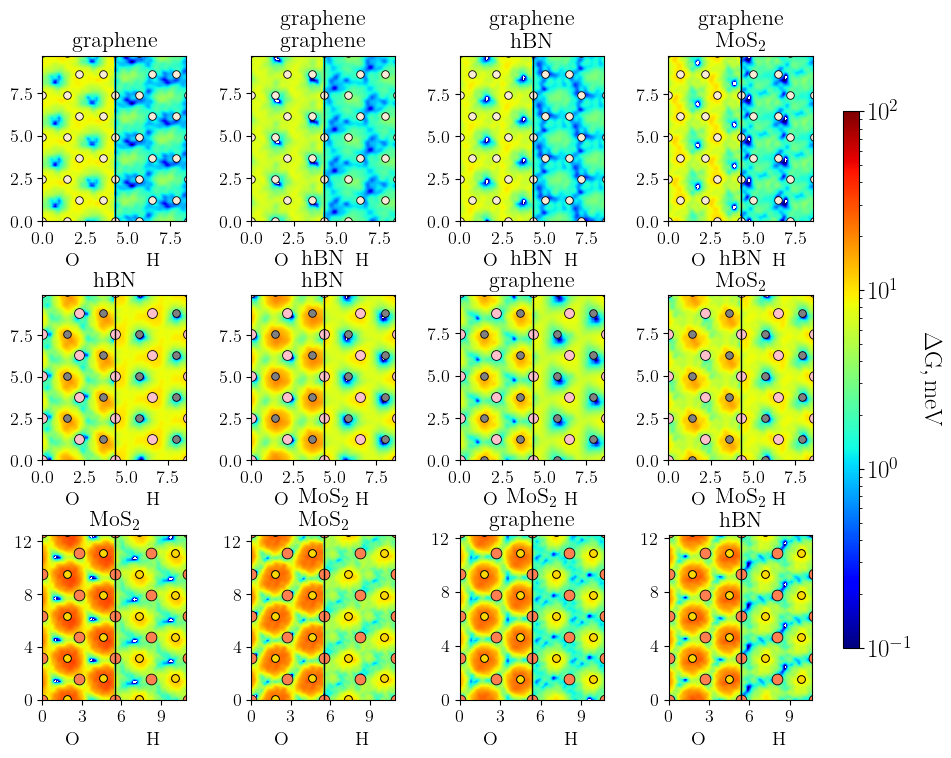

In [11]:
fig, ax = plt.subplots(ncols = 4, nrows = 3, figsize = (8, 6.5),sharey=False, sharex=False)
plt.subplots_adjust(left=0, bottom=0.0, right=1, top=0.99, wspace=0.2,
                hspace=0.45)
a = 1
plot_alpha=1
my_cmap = plt.cm.jet(np.arange(plt.cm.jet.N))

my_cmap[:,0:3] *= a 
my_cmap = ListedColormap(my_cmap)
vmaxO = 100
vmaxH = 25
vminO = 0.1
vminH = 0.1
free_ener_ox = {}
free_ener_hy = {}
for idx_row, (top, label_top, lattice_top) in enumerate(zip(materials_subgroups, labels_subgroups, lattice_subgroups)):
    for idx_col, (bot, label, lattice) in enumerate(zip(top, label_top, lattice_top)):
        df = pd.read_csv('free-energy-surface-corrugation/films/{}/freeO_hex.dat'.format(bot), header = 0, sep='\s+' ).reset_index()
        x = df.iloc[:, 0].drop_duplicates()
        y = df.iloc[:, 1].drop_duplicates()
        X, Y = np.meshgrid(x, y)
        zO = df.iloc[:, 2].to_numpy() *1000
        free_ener_ox[bot] = max(zO)
        df = pd.read_csv('free-energy-surface-corrugation/films/{}/freeH_hex.dat'.format(bot), header = 0, sep='\s+' ).reset_index()
        zH = df.iloc[:, 2].to_numpy() *1000
        free_ener_hy[bot] = max(zH)
        ZO = np.reshape(zO[:int(zO.shape[0]/4)], (int(len(x)/4), len(y))).T
        ZH = np.reshape(zH[int(zO.shape[0]/4):int(zO.shape[0]/2)], (int(len(x)/4), len(y))).T
        print(bot, max(zO), max(zH))
        half = int(zH.shape[0]/4)
        extentO = np.min(x), np.max(x)/4, np.min(y), np.max(y)
        extentH = np.max(x)/4, np.max(x)/2, np.min(y), np.max(y)
        
        if bot == 'mos_single':
            mos_O = ax[idx_row,idx_col].imshow(ZO, cmap=my_cmap, interpolation='bessel', alpha = plot_alpha, norm=LogNorm(vmin=vminO, vmax=vmaxO), extent=extentO)
            mos_H = ax[idx_row,idx_col].imshow(ZH, cmap=my_cmap, interpolation='bessel', alpha = plot_alpha, norm=LogNorm(vmin=vminH, vmax=vmaxO), extent=extentH)
        else:
            ax[idx_row,idx_col].imshow(ZO, cmap=my_cmap, interpolation='bessel', alpha = plot_alpha, norm=LogNorm(vmin=vminO, vmax=vmaxO), extent=extentO)
            ax[idx_row,idx_col].imshow(ZH, cmap=my_cmap, interpolation='bessel', alpha = plot_alpha, norm=LogNorm(vmin=vminH, vmax=vmaxO), extent=extentH)
        
        df_mat = pd.read_csv('free-energy-surface-corrugation/{}_wrapped.xyz'.format(bot,bot), header = 0, sep='\s+' )
        C = df_mat.loc[(df_mat['Name'] == 'C')];
        B = df_mat.loc[(df_mat['Name'] == 'B')]; N = df_mat.loc[(df_mat['Name'] == 'N')]
        Mo = df_mat.loc[(df_mat['Name'] == 'Mo')]; S = df_mat.loc[(df_mat['Name'] == 'S')]
        
        C.plot(kind='scatter', x = "x", y = "y", ax = ax[idx_row,idx_col], c='antiquewhite', ec='black', lw=0.6, s=30, xlim=(np.min(x),np.max(x)/2), ylim=(np.min(y),np.max(y)))
        B.plot(kind='scatter', x = "x", y = "y", ax = ax[idx_row,idx_col], c='pink', ec='black', lw=0.6, s=50, xlim=(np.min(x),np.max(x)/2), ylim=(np.min(y),np.max(y)))
        N.plot(kind='scatter', x = "x", y = "y", ax = ax[idx_row,idx_col], c='gray', ec='black', lw=0.6, s=30, xlim=(np.min(x),np.max(x)/2), ylim=(np.min(y),np.max(y)) )
        Mo.plot(kind='scatter', x = "x", y = "y", ax = ax[idx_row,idx_col], c='coral', ec='black', lw=0.6, s=60, xlim=(np.min(x),np.max(x)/2), ylim=(np.min(y),np.max(y)) )
        S.plot(kind='scatter', x = "x", y = "y", ax = ax[idx_row,idx_col], c='gold', ec='black', lw=0.6, s=30, xlim=(np.min(x),np.max(x)/2), ylim=(np.min(y),np.max(y)) )

        ax[idx_row,idx_col].tick_params(direction='out', grid_alpha=1, labelsize = 13)
        ax[idx_row,idx_col].xaxis.set_major_locator(plt.MaxNLocator(4))
        ax[idx_row,idx_col].yaxis.set_major_locator(plt.MaxNLocator(4))
        ax[idx_row,idx_col].set_title(r'{}'.format(label), fontsize = 16)
        ax[idx_row,idx_col].plot((x[half],x[half]) , (0, Y[-1][-1]), lw=1, c='black')
        ax[idx_row,idx_col].set(xlabel='$\mathrm{O\hspace{1.7cm}H}$', ylabel=None)
        ax[idx_row,idx_col].xaxis.label.set_size(14)


        
# #Cbar settings H
cbar_ax = fig.add_axes([1.02, 0.08, 0.02, 0.825])
cb = plt.colorbar(mos_O, cax=cbar_ax)
cb.set_alpha(plot_alpha)
cb.ax.tick_params(labelsize=18) 
cbar_ax.set_ylabel(r'$\mathrm{\Delta G, meV}$', rotation=270, labelpad=20, y=0.5, fontsize = 18)
df_free_ener_bulk = pd.concat([pd.DataFrame(free_ener_ox.items()), pd.DataFrame(free_ener_hy.items())[1]], ignore_index=True,axis=1).rename({0:'Material',1:'G_O',2:'G_H'},axis=1)

## CONFINED

37.100573368576 ,
37.100573368576 ,
38.53395323897005 ,
38.354858701449594 ,
40.00847130062501 ,
40.00847130062501 ,
38.53395323897005 ,
102.13206469368097 ,
102.13206469368097 ,
93.6789304826789 ,


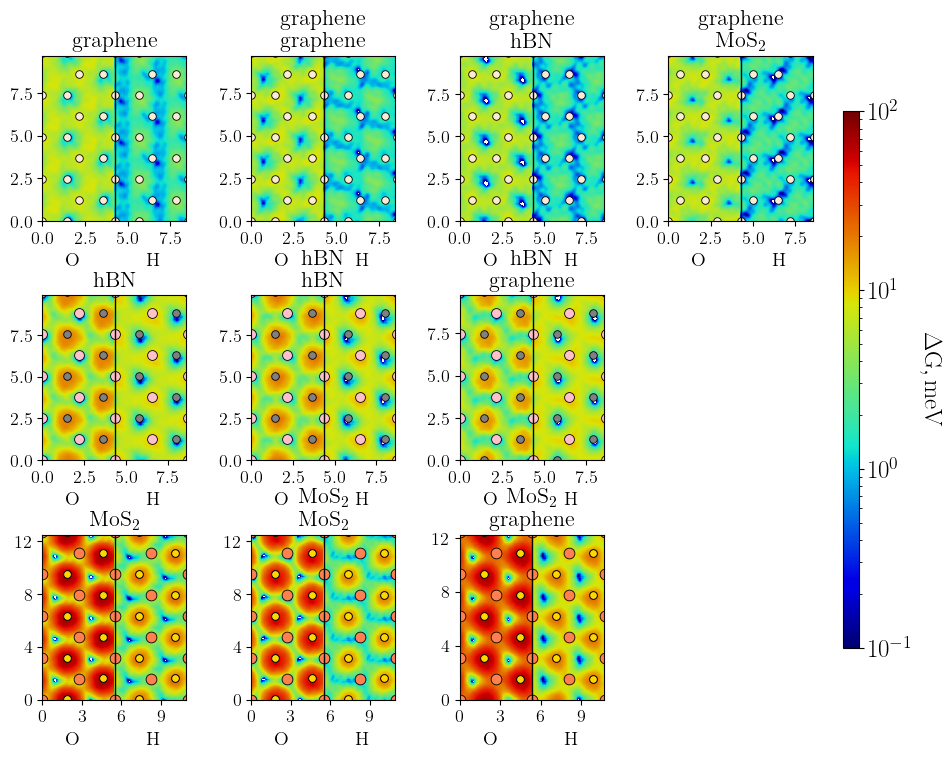

In [12]:
fig, ax = plt.subplots(ncols = 4, nrows = 3, figsize = (8, 6.5),sharey=False, sharex=False)
plt.subplots_adjust(left=0, bottom=0.0, right=1, top=0.99, wspace=0.2,
                hspace=0.45)
a = 0.9
plot_alpha = 1
my_cmap = plt.cm.jet(np.arange(plt.cm.jet.N))
my_cmap[:,0:3] *= a 
my_cmap = ListedColormap(my_cmap)
vmaxO = 100
vmaxH = 25
vminO = 0.1
vminH = 0.1
free_ener_ox = {}
free_ener_hy = {}
for idx_row, (top, label_top, lattice_top) in enumerate(zip(materials_subgroups, labels_subgroups, lattice_subgroups_conf)):
    for idx_col, (bot, label, lattice) in enumerate(zip(top, label_top, lattice_top)):
        if bot != 'mos_hbn' and bot != 'hbn_mos':
            df = pd.read_csv('free-energy-surface-corrugation/confined/{}/freeO_hex.dat'.format(bot), header = 0, sep='\s+' ).reset_index()
            x = df.iloc[:, 0].drop_duplicates()
            y = df.iloc[:, 1].drop_duplicates()
            X, Y = np.meshgrid(x, y)
            zO = df.iloc[:, 2].to_numpy() *1000
            free_ener_ox[bot] = max(zO)
            df = pd.read_csv('free-energy-surface-corrugation/confined/{}/freeH_hex.dat'.format(bot), header = 0, sep='\s+' ).reset_index()
            zH = df.iloc[:, 2].to_numpy() *1000
            free_ener_hy[bot] = max(zH)
            ZO = np.reshape(zO[:int(zO.shape[0]/4)], (int(len(x)/4), len(y))).T
            ZH = np.reshape(zH[int(zO.shape[0]/4):int(zO.shape[0]/2)], (int(len(x)/4), len(y))).T
            print(lattice**4, ',')
            half = int(zH.shape[0]/4)
            extentO = np.min(x), np.max(x)/4, np.min(y), np.max(y)
            extentH = np.max(x)/4, np.max(x)/2, np.min(y), np.max(y)
            
            if bot == 'mos_single':
                mos_O = ax[idx_row,idx_col].imshow(ZO, cmap=my_cmap, interpolation='bessel', alpha = plot_alpha, norm=LogNorm(vmin=vminO, vmax=vmaxO), extent=extentO)
                mos_H = ax[idx_row,idx_col].imshow(ZH, cmap=my_cmap, interpolation='bessel', alpha = plot_alpha, norm=LogNorm(vmin=vminH, vmax=vmaxO), extent=extentH)
            else:
                ax[idx_row,idx_col].imshow(ZO, cmap=my_cmap, interpolation='bessel', alpha = plot_alpha, norm=LogNorm(vmin=vminO, vmax=vmaxO), extent=extentO)
                ax[idx_row,idx_col].imshow(ZH, cmap=my_cmap, interpolation='bessel', alpha = plot_alpha, norm=LogNorm(vmin=vminH, vmax=vmaxO), extent=extentH)
            
            df_mat = pd.read_csv('free-energy-surface-corrugation/{}_wrapped.xyz'.format(bot), header = 0, sep='\s+'  )
            C = df_mat.loc[(df_mat['Name'] == 'C')];
            B = df_mat.loc[(df_mat['Name'] == 'B')]; N = df_mat.loc[(df_mat['Name'] == 'N')]
            Mo = df_mat.loc[(df_mat['Name'] == 'Mo')]; S = df_mat.loc[(df_mat['Name'] == 'S')]
            
            C.plot(kind='scatter', x = "x", y = "y", ax = ax[idx_row,idx_col], c='antiquewhite', ec='black', lw=0.6, s=30, xlim=(np.min(x),np.max(x)/2), ylim=(np.min(y),np.max(y)))
            B.plot(kind='scatter', x = "x", y = "y", ax = ax[idx_row,idx_col], c='pink', ec='black', lw=0.6, s=50, xlim=(np.min(x),np.max(x)/2), ylim=(np.min(y),np.max(y)))
            N.plot(kind='scatter', x = "x", y = "y", ax = ax[idx_row,idx_col], c='gray', ec='black', lw=0.6, s=30, xlim=(np.min(x),np.max(x)/2), ylim=(np.min(y),np.max(y)) )
            Mo.plot(kind='scatter', x = "x", y = "y", ax = ax[idx_row,idx_col], c='coral', ec='black', lw=0.6, s=60, xlim=(np.min(x),np.max(x)/2), ylim=(np.min(y),np.max(y)) )
            S.plot(kind='scatter', x = "x", y = "y", ax = ax[idx_row,idx_col], c='gold', ec='black', lw=0.6, s=30, xlim=(np.min(x),np.max(x)/2), ylim=(np.min(y),np.max(y)) )

            ax[idx_row,idx_col].tick_params(direction='out', grid_alpha=1, labelsize = 13)
            ax[idx_row,idx_col].xaxis.set_major_locator(plt.MaxNLocator(4))
            ax[idx_row,idx_col].yaxis.set_major_locator(plt.MaxNLocator(4))
            ax[idx_row,idx_col].set_title(r'{}'.format(label), fontsize = 16)
            ax[idx_row,idx_col].plot((x[half],x[half]) , (0, Y[-1][-1]), lw=1, c='black')
            ax[idx_row,idx_col].set(xlabel='$\mathrm{O\hspace{1.7cm}H}$', ylabel=None)
            ax[idx_row,idx_col].xaxis.label.set_size(14)
ax[1,3].axis('off')
ax[2,3].axis('off')
# #Cbar settings H
cbar_ax = fig.add_axes([1.02, 0.08, 0.02, 0.825])
cb = plt.colorbar(mos_O, cax=cbar_ax)
cb.set_alpha(plot_alpha)
cb.ax.tick_params(labelsize=18) 
cbar_ax.set_ylabel(r'$\mathrm{\Delta G, meV}$', rotation=270, labelpad=20, y=0.5, fontsize = 18)
df_free_ener_conf = pd.concat([pd.DataFrame(free_ener_ox.items()), pd.DataFrame(free_ener_hy.items())[1]], ignore_index=True,axis=1).rename({0:'Material',1:'G_O',2:'G_H'},axis=1)

# Figures

/var/folders/0n/6bd9x6ns2qj413jttymq46yw0000gn/T/ipykernel_29382/4191461882.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =  cm.get_cmap('viridis',5)
/var/folders/0n/6bd9x6ns2qj413jttymq46yw0000gn/T/ipykernel_29382/4191461882.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_b.set_xticklabels(labels)
/var/folders/0n/6bd9x6ns2qj413jttymq46yw0000gn/T/ipykernel_29382/4191461882.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  fit_gra[float(np.round(gammas -gamma_w,2))] = ddos[0]/10000
/var/folders/0n/6bd9x6ns2qj413jttymq46yw0000gn/T/ipykernel_29382/4191461882.py:47: FutureWarning: Calling float on a single element Ser

gra_single 184.881633949806 39.826583144007515
gra_bi 189.48193268042243 39.381572662757804
hbn_gra 195.96835121449942 58.407886044687295
mos_gra 113.32943211708266 37.709843675160066
hbn_single 32.127928447039594 11.511108223272235
hbn_bi 36.80013295507235 4.1967228540236805
gra_hbn 41.92814907922759 9.7745590635666
mos_hbn 37.22375130331924 16.897543512860558
mos_single 13.959836613615682 3.322588445465187
mos_bi 13.468535374431116 2.321654922102847
gra_mos 13.79685033111114 2.380106133953742
hbn_mos 12.831360048757041 3.2429651136070485


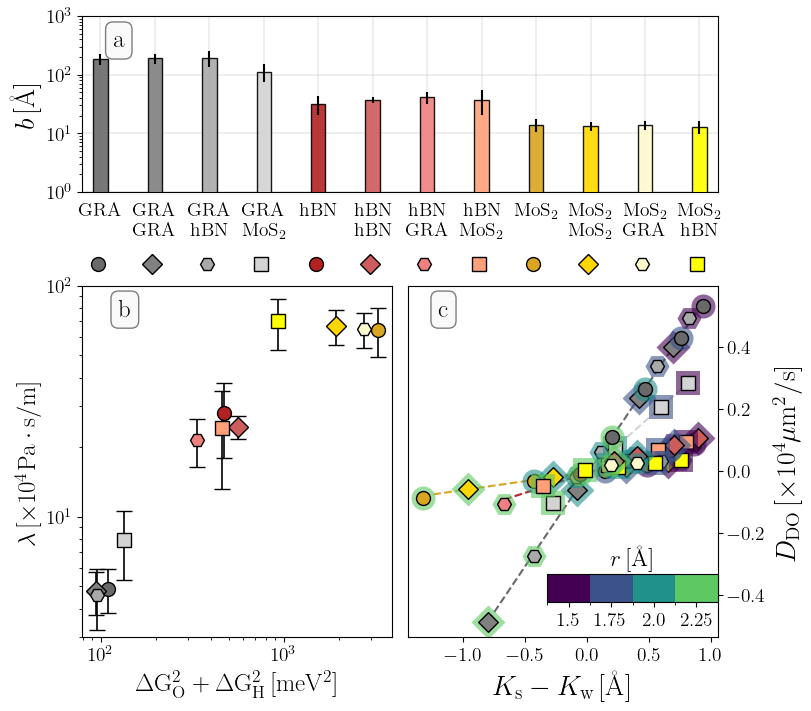

In [13]:
fig = plt.figure(constrained_layout=True, figsize=(8,7))
height = [1,2]
width=[1,1]
spec3 = fig.add_gridspec(ncols=2, nrows=2, height_ratios=height,width_ratios=width,wspace=0, hspace=0)
ax_b = fig.add_subplot(spec3[0,:])
ax_ddo = fig.add_subplot(spec3[1,1])
ax_deltaG = fig.add_subplot(spec3[1,0])
x_spacing = np.arange(0,36,3)
width = 0.8
cmap =  cm.get_cmap('viridis',5) 
cmap_colors = cmap(np.arange(0,cmap.N))

for material, spacing, color in zip(materials, x_spacing, colors):
    b = eta / returned_lambdamax_mean[material] * m_to_angstrom
    yerr = returned_lambdamax_mean_relative_err[material] * b
    print(material, b, yerr)
    slip = ax_b.bar(spacing ,b , width,  color=color, alpha=0.9, edgecolor = 'black',linewidth=1, yerr= yerr, zorder=3)
ax_b.grid(zorder=0,linewidth=0.3)
ax_b.tick_params(bottom=False)
ax_b.set_ylabel(r'$b\hspace{0.1 cm}[\mbox{\normalfont\AA}]$',fontsize=20)
ax_b.set_xticklabels(labels)
tick_spacing = 3
ax_b.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#################                 DDO NEW           ################
ls='L_s'
lw='L_w'
gs= 'Gamma_s'
gw='Gamma_w'
ddo='-ddo'
markers =['o', 'D', 'H', 's','o', 'D', 'H', 's','o', 'D', 'H', 's']
fit_bn = {}
fit_mos = {}
fit_gra = {}
fit_mos_gra = {}
for idx_r, r in enumerate(cavities[:-4]):
    for idx, (material,color) in enumerate(zip(materials, colors)):
        ddos=df_ddoP[(df_ddoP['Radius'] == r) & (df_ddoP['Material'] == material)][ddo].values
        gammas = df_ddoP[(df_ddoP['Radius'] == r) & (df_ddoP['Material'] == material)][gs]
        gamma_w = df_ddoP[(df_ddoP['Radius'] == r) & (df_ddoP['Material'] == material)][gw]
        l_w = df_ddoP[(df_ddoP['Radius'] == r) & (df_ddoP['Material'] == material)][lw]
        l_s = df_ddoP[(df_ddoP['Radius'] == r) & (df_ddoP['Material'] == material)][ls]
        if material in materials_subgroups[1]:
            fit_bn[float(np.round(gammas -gamma_w,2))] = ddos[0]/10000
        elif material in materials_subgroups[2]:
            fit_mos[float(np.round(gammas -gamma_w,2))] = ddos[0]/10000
        elif material == 'mos_gra':
            fit_mos_gra[float(np.round(gammas -gamma_w,2))] = ddos[0]/10000
        else:
            fit_gra[float(np.round(gammas -gamma_w,2))] = ddos[0]/10000
        highlighted_ddo = ax_ddo.scatter( (gammas -gamma_w), ddos/10000,  color=cmap_colors[idx_r], alpha=0.6, linewidth=0, s=300,marker=markers[idx], label=r)
        scatter_ddo = ax_ddo.scatter( (gammas -gamma_w), ddos/10000,  color=color, alpha=1, linewidth=1, s=100, ec='black',marker=markers[idx], label=r)
        cmap_colors[idx_r] = (*cmap_colors[idx_r][:3], 0.1)  # Change the alpha value
#fit BN
fit_bn_x = list((dict(sorted(fit_bn.items())).keys())) # x
fit_bn_y = list((dict(sorted(fit_bn.items())).values())) # y
popt_line, _ = curve_fit(fit_line, fit_bn_x, fit_bn_y)
ax_ddo.plot(fit_bn_x, fit_line(np.array(fit_bn_x), *popt_line),ls='--', c='firebrick', zorder=0)
#fit MOS
fit_mos_x = list((dict(sorted(fit_mos.items())).keys())) # x
fit_mos_y = list((dict(sorted(fit_mos.items())).values())) # y
popt_line, _ = curve_fit(fit_line, fit_mos_x, fit_mos_y)
ax_ddo.plot(fit_mos_x, fit_line(np.array(fit_mos_x), *popt_line),ls='--', c='goldenrod', zorder=0)
#fit GRA
fit_gra_x = list((dict(sorted(fit_gra.items())).keys())) # x
fit_gra_y = list((dict(sorted(fit_gra.items())).values())) # y
popt_line, _ = curve_fit(fit_line, fit_gra_x, fit_gra_y)
ax_ddo.plot(fit_gra_x, fit_line(np.array(fit_gra_x), *popt_line),ls='--', c='dimgray', zorder=0)
#fit GRA_MOS
fit_mos_gra_x = list((dict(sorted(fit_mos_gra.items())).keys())) # x
fit_mos_gra_y = list((dict(sorted(fit_mos_gra.items())).values())) # y
popt_line, _ = curve_fit(fit_line, fit_mos_gra_x, fit_mos_gra_y)
ax_ddo.plot(fit_mos_gra_x, fit_line(np.array(fit_mos_gra_x), *popt_line),ls='--', c='lightgrey', zorder=0)
############ from 1.5 to 2.25
bounds = [1.5, 1.75, 2.0,2.25, 2.5]
norm = mpl.colors.BoundaryNorm(bounds, 4)
cax_ddo = ax_ddo.inset_axes([0.45, 0.1, 0.55, 0.08])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),cax=cax_ddo, orientation='horizontal')
cbar.ax.locator_params(nbins=10)
cbar.set_alpha(0.2)
cbar.set_ticks([1.625,1.875 ,2.125,2.375])
cbar.set_ticklabels(['$1.5$','$1.75$', '$2.0$','$2.25$'])  # Labels for the ticks
cbar.ax.set_title(r'$r\hspace{0.1cm}[\mbox{\normalfont\AA}]$')
props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)

ax_b.set_yscale('log')
ax_ddo.set_xlabel(r'$K_{\mathrm{s}}-K_{\mathrm{w}} \hspace{0.1 cm}[\mbox{\normalfont\AA}] $',fontsize=20)
ax_ddo.set_ylabel(r'$D_{\mathrm{DO}}\hspace{0.1 cm}[\times 10^4 \mathrm{\mu m^2/s} ]$',fontsize=20)
ax_b.axis([-1,34,1,1000])

fmt_group = ['o', 'D', 'H', 's']
scale=1e4
delta_sq = {}
for idx_t,(tm,tl,tc) in enumerate(zip(materials_subgroups,labels_subgroups,colors_subgroups)):
    for idx_b, (m,l,c) in enumerate(zip(tm,tl,tc)):
        if m == 'hbn_mos' or m == 'mos_hbn':
            tgo = df_free_ener_bulk[df_free_ener_bulk["Material"] == m]["G_O"].values
            tgh = df_free_ener_bulk[df_free_ener_bulk["Material"] == m]["G_H"].values
            lam = returned_lambdamax_mean[m]/1e4
            err = returned_lambdamax_mean_relative_err[m] * lam
        else:
            tgo_conf = df_free_ener_conf[df_free_ener_conf["Material"] == m]["G_O"].values
            tgo_bulk = df_free_ener_bulk[df_free_ener_bulk["Material"] == m]["G_O"].values
            tgh_bulk = df_free_ener_bulk[df_free_ener_bulk["Material"] == m]["G_H"].values
            tgh_conf = df_free_ener_conf[df_free_ener_conf["Material"] == m]["G_H"].values
            tgo = np.mean((tgo_conf, tgo_bulk))
            tgh = np.mean((tgh_conf,tgh_bulk))
            lam = returned_lambdamax_mean[m]/1e4
            err = returned_lambdamax_mean_relative_err[m] * lam
            delta_sq[float(np.round((tgh**2+tgo**2), 2))] = lam
        ax_deltaG.errorbar(tgh**2+tgo**2,lam, yerr = err,c='black',capsize=6,fmt=fmt_group[idx_b], ecolor='black', elinewidth=1.2, mfc=c, ms=10,label=l)
        ax_b.errorbar(x_spacing[idx_b+ idx_t*len(tm)]-width/2+0.25,0.06,c='black',fmt=fmt_group[idx_b], elinewidth=1, mfc=c, ms=10,label=l,clip_on=False,lw=1)
ax_deltaG.set_ylim([3,100])
ax_deltaG.set_xlabel(r'$\mathrm{\Delta G^2_O+\Delta G^2_H}\hspace{0.1 cm}[\mathrm{meV^2}]$', fontsize=18)
ax_deltaG.set_ylabel(r'$\mathrm{\lambda}\hspace{0.1 cm}[\times 10^4 \mathrm{Pa\cdot s/m}]$', fontsize=18)
ax_deltaG.set_xscale('log')
ax_deltaG.set_yscale('log')
ax_deltaG.yaxis.set_label_position("left")
ax_ddo.yaxis.set_label_position("right")
ax_ddo.yaxis.tick_right()
ax_b.text(0.7,300,'$\mathrm{a}$', fontsize = 18, bbox=props)
ax_ddo.text(-1.2,0.50,'$\mathrm{c}$', fontsize = 18, bbox=props)
ax_deltaG.text(125,74,'$\mathrm{b}$', fontsize = 18, bbox=props)
ax_ddo.xaxis.set_major_locator(plt.MaxNLocator(5))

In [14]:
# objective function
def fit_fourth(x, a, b):
	return a*x**4 + b

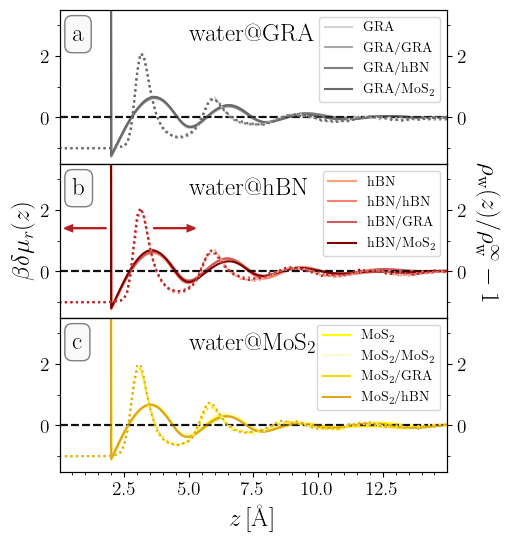

In [15]:
fig,ax = plt.subplots(nrows=3,ncols=1, figsize=(5,6), sharex=True, sharey=False)
plt.rc('text', usetex=True)
plt.subplots_adjust(wspace=0, hspace=0)
custom_cycler_gra = (cycler(color=['lightgrey','darkgrey','gray','dimgray'])) 
custom_cycler_hbn = (cycler(color=['lightsalmon','salmon','indianred', 'maroon'])) 
custom_cycler_mos = (cycler(color=['yellow','lemonchiffon','gold','goldenrod'])) 
mat_names = (('GRA','GRA/GRA','GRA/hBN','GRA/MoS_2'),('hBN','hBN/hBN','hBN/GRA','hBN/MoS_2'),('MoS_2','MoS_2/MoS_2','MoS_2/GRA', 'MoS_2/hBN'))
r_size = '2.00'
ax[0].set_prop_cycle(custom_cycler_gra)
ax[1].set_prop_cycle(custom_cycler_hbn)
ax[2].set_prop_cycle(custom_cycler_mos)
n = 0
fmt_group = ['o', '^', '>', '*']*3
labelfntsize=18

for (row_idx, material_family), mat_name in zip(enumerate(materials_subgroups), mat_names):
    ax_dens = ax[row_idx].twinx()
    ax_dens.tick_params(labelsize=14)
    if row_idx == 1:ax_dens.set_ylabel(r'$\rho_\mathrm{w}(z)/\rho_\mathrm{w}^{\infty} - 1$',fontsize=labelfntsize,rotation=-90); ax_dens.yaxis.set_label_coords(1.14, 0.55)
    for (col_idx, material), mn in zip(enumerate(material_family), mat_name):
        tit = df_dens['Material'][n]
        first = 70
        last = 85
        pltline, = ax[row_idx].plot((df_enerP['z'][material][r_size]), df_enerP['DeltaG'][material][r_size],linewidth=1.5, label='$\mathrm{%s}$'%(mn))
        pltmarker = plt.Line2D([], [], marker=fmt_group[col_idx], mec='black', ms=10, label='$\mathrm{%s}$'%(mn),color=colors_reverse[n])
        ax[row_idx].tick_params(labelsize=14)
        ax[row_idx].axis([0.01,14.99,-1.5,3.5])
        ax[row_idx].yaxis.set_minor_locator(ticker.MultipleLocator(1))
        ax_dens.yaxis.set_minor_locator(ticker.MultipleLocator(1))
        ax[row_idx].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
        ax[row_idx].axhline(y=0, color='black', linestyle='dashed', alpha=0.5)
        dens_bulk = df_dens['Density'][n][first:last].mean()
        ax_dens.plot(df_dens['z'][n], (df_dens['Density'][n]/dens_bulk)-1, ls=':',color=colors_reverse[n])
        n += 1
        ax_dens.axis([0.01,14.99,-1.5,3.5])
        ax[row_idx].legend(loc='upper right', fontsize=10)
    
ax[0].text(5,2.5,'$\mathrm{water @ GRA}$', fontsize = labelfntsize)
ax[1].text(5,2.5,'$\mathrm{water @ hBN}$', fontsize = labelfntsize)
ax[2].text(5,2.5,'$\mathrm{water @ MoS_2}$', fontsize = labelfntsize)
ax[1].set_ylabel(r'$\beta\delta\mu_{r}(z)$',fontsize=labelfntsize)
ax[2].set_xlabel(r'$z \hspace{0.1 cm} [\mbox{\normalfont\AA}]$',fontsize=labelfntsize)
props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)
ax[0].text(0.5,2.5,'$\mathrm{a}$', fontsize = labelfntsize, bbox=props)
ax[1].text(0.5,2.5,'$\mathrm{b}$', fontsize = labelfntsize, bbox=props)
ax[2].text(0.5,2.5,'$\mathrm{c}$', fontsize = labelfntsize, bbox=props)
ax[1].arrow(1.8,1.4,-1.6,0,head_width=.2,shape='full',lw=1.3,length_includes_head=True,color='firebrick')
ax[1].arrow(3.65,1.4,1.6,0,head_width=.2,shape='full',lw=1.3,length_includes_head=True,color='firebrick')


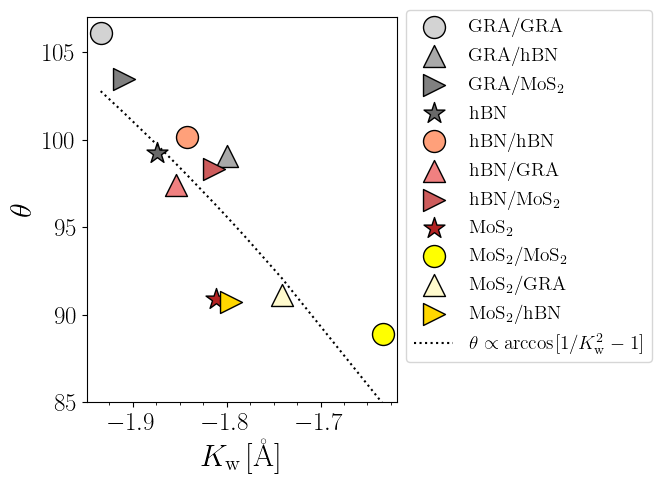

In [16]:
fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(4,5), sharex=False, sharey=False)
plt.rc('text', usetex=True)
plt.subplots_adjust(wspace=0, hspace=0)
mat_names = (('GRA','GRA/GRA','GRA/hBN','GRA/MoS_2'),('hBN','hBN/hBN','hBN/GRA','hBN/MoS_2'),('MoS_2','MoS_2/MoS_2','MoS_2/GRA', 'MoS_2/hBN'))
r_size = '2.00'
n = 0
labelfntsize=22
markers = ['o', '^', '>', '*']*3
for imat, (mat,c,wca_mat,l) in enumerate(zip(materials,colors_reverse,wca_all,labels_1row[1:])):
    kw = df_ddoP[(df_ddoP['Material'] == mat) & (df_ddoP['Radius'] == r_size)]['Gamma_w']
    ax.scatter( kw, wca_all[wca_mat], c=c, s=250, ec='black',marker=markers[imat], label=l)
#create a dictionary for fitting and sort it by Kw        
dict1 = {list(df_ddoP['Gamma_w'].drop_duplicates())[i]: list(wca_all.values())[i] for i in range(len(list(wca_all.values())))}
dict1_sorted = dict(sorted(dict1.items()))
popt, _ = curve_fit(fit_arccos, list(dict1_sorted.keys()),list(dict1_sorted.values()) )
ax.plot(list(dict1_sorted.keys()),fit_arccos(np.array(list(dict1_sorted.keys())), *popt), c='k', ls=':',label='$\\theta\propto\\arccos[1/K^2_{\mathrm{w}}-1]$')
ax.set_xlabel(r'$K_{\mathrm{w}} \hspace{0.1 cm} [\mbox{\normalfont\AA}]$', fontsize=labelfntsize)
ax.legend(loc='best',fontsize=14,bbox_to_anchor=(1, 1.045),ncol=1)

ax.set_ylabel(r'$\theta$',fontsize = labelfntsize)
props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)
ax.set_ylim(85,107)
ax.tick_params(labelsize=18)
# Set minor ticks for y-axis every 5
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
# Set minor ticks for x-axis every 0.25
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.025))


#### free energy profiles for all materials as a function of the radius

/var/folders/0n/6bd9x6ns2qj413jttymq46yw0000gn/T/ipykernel_29382/349603473.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap =  cm.get_cmap('coolwarm',5)


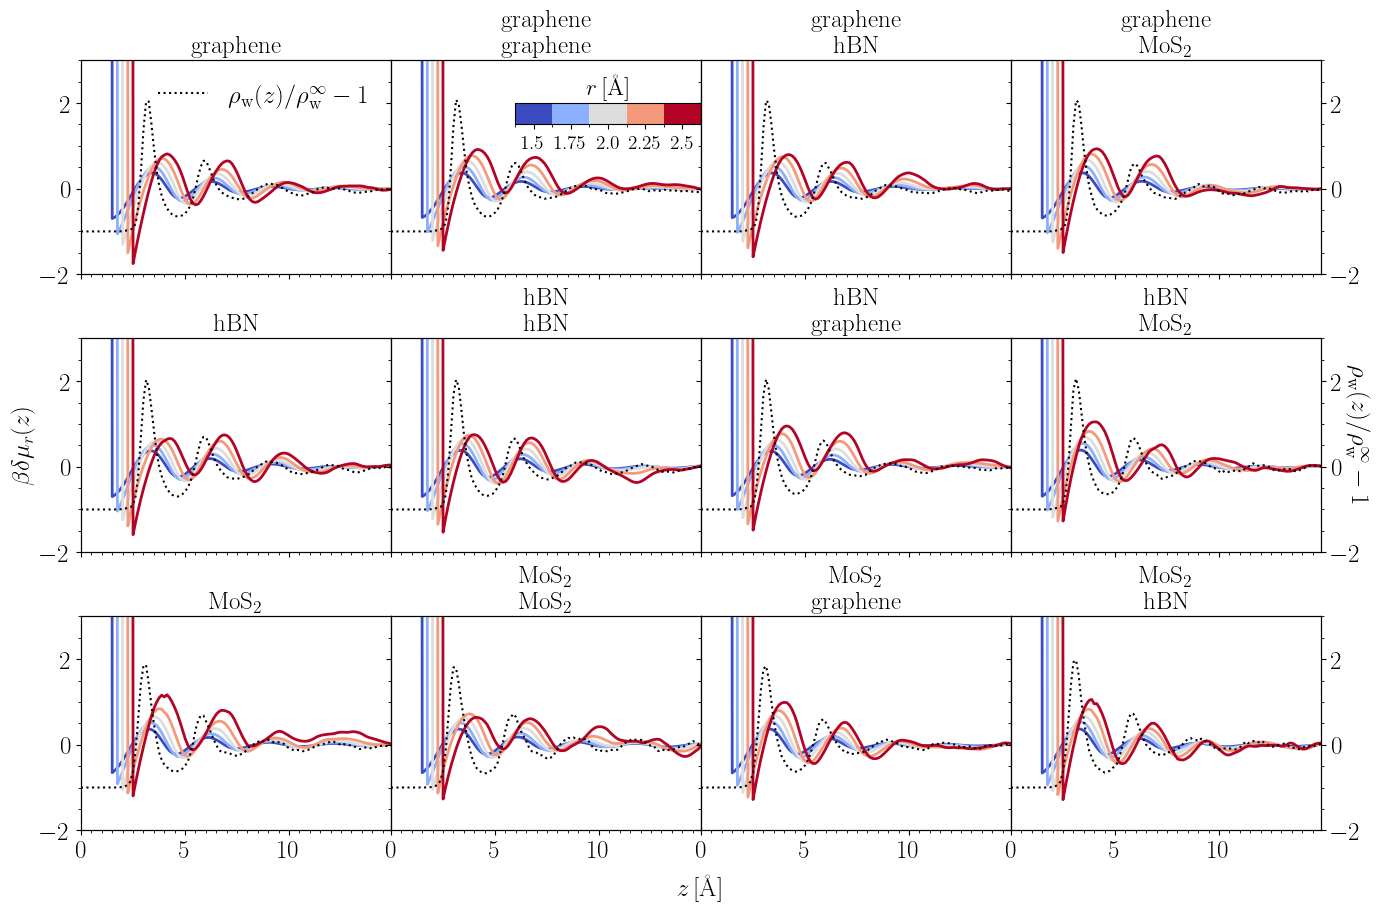

In [17]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(16, 10), ncols=4, nrows=3, sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.3, wspace=0)
cmap =  cm.get_cmap('coolwarm',5) 
cmap_colors = cmap(np.arange(0,cmap.N))
n = 0
for idx_t, (tm, tl) in enumerate(zip(materials_subgroups, labels_subgroups)):
    for idx_b, (m, l) in enumerate(zip(tm, tl)):
        for idx_r, r_size in enumerate(cavities[:-3]):
            ax[idx_t, idx_b].plot(df_enerP['z'][m][r_size], df_enerP['DeltaG'][m][r_size], linewidth=2, c=cmap_colors[idx_r],label='$\mathrm{r =%s}$' % (r_size))
            ax[idx_t, idx_b].set_title(l, fontsize=18)
            ax[idx_t, idx_b].tick_params(labelsize=14)
            ax[idx_t, idx_b].axis([0, 14.9, -2, 3])
            ax[idx_t, idx_b].xaxis.set_minor_locator(plt.MultipleLocator(1))
            ax[idx_t, idx_b].yaxis.set_minor_locator(plt.MultipleLocator(0.25))
            ax[idx_t, idx_b].tick_params(axis='x', labelsize=18)  # Set xticks fontsize to 18
            ax[idx_t, idx_b].tick_params(axis='y', labelsize=18) 
        ax_dens = ax[idx_t, idx_b].twinx()
        ax_dens.xaxis.set_minor_locator(plt.MaxNLocator(35))
        ax_dens.yaxis.set_minor_locator(plt.MaxNLocator(12))
        if (idx_b == 3 and idx_t == 1):ax_dens.set_ylabel(r'$\rho_\mathrm{w}(z)/\rho_\mathrm{w}^{\infty} - 1$',fontsize=18,rotation=-90); ax_dens.yaxis.set_label_coords(1.16, 0.55)
        if idx_b != 3: ax_dens.get_yaxis().set_visible(False)
        first = 70
        last = 85
        dens_bulk = df_dens['Density'][n][first:last].mean()
        ax_dens.plot(df_dens['z'][n], (df_dens['Density'][n]/dens_bulk)-1, ls=':',color='k', label=r'$\rho_\mathrm{w}(z)/\rho_\mathrm{w}^\infty -1$')
        n += 1
        ax[idx_t, idx_b].xaxis.set_minor_locator(plt.MaxNLocator(35))
        ax[idx_t, idx_b].yaxis.set_minor_locator(plt.MaxNLocator(12))
        ax_dens.set_ylim(-2,3)
        ax_dens.tick_params(axis='x', labelsize=18)  # Set xticks fontsize to 18
        ax_dens.tick_params(axis='y', labelsize=18) 
        if idx_t == 0 and idx_b == 0:
            ax_dens.legend(loc=1,  ncol=1, fontsize=18, frameon=False)
        if idx_t == 0 and idx_b == 1:
            # ax_dens.legend(loc=4,  ncol=1, fontsize=18, frameon=False)
#######################
            bounds = [1.5, 1.75, 2.0,2.25, 2.5, 2.75]
            norm = mpl.colors.BoundaryNorm(bounds, 5)
            cax = ax[idx_t, idx_b].inset_axes([0.4, 0.7, 0.6, 0.1])
            cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),cax=cax, orientation='horizontal')
            cbar.ax.locator_params(nbins=14)
            cbar.set_alpha(0.8)
            cbar.set_ticks([1.625,1.875 ,2.125,2.375,2.625])
            cbar.set_ticklabels(['$1.5$','$1.75$', '$2.0$','$2.25$', '$2.5$'])  # Labels for the ticks
            cbar.ax.set_title(r'$r\hspace{0.1cm}[\mbox{\normalfont\AA}]$')
            props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)
#############################
ax[1, 0].set_ylabel(r'$\beta\delta\mu_{r}(z)$', fontsize=18)
ax[2, 1].set_xlabel(r'$z \hspace{0.1 cm} [\mbox{\normalfont\AA}]$', fontsize=18)
ax[2, 1].xaxis.set_label_coords(1, -.2)

Text(10.6, 7, '$\\mathrm{e}$')

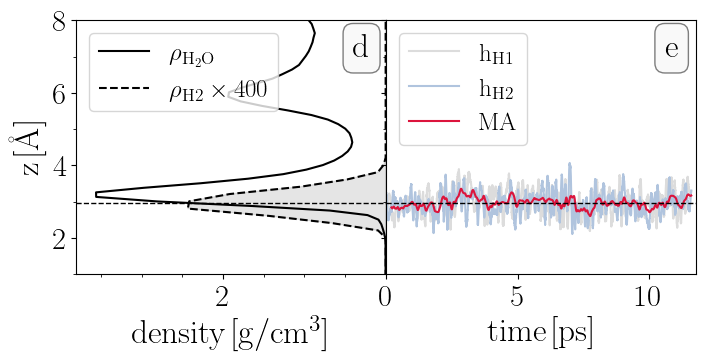

In [18]:
fig, ax = plt.subplots(ncols = 2, nrows=1, figsize = (8,3.3), sharex =False, sharey=True)
plt.subplots_adjust(wspace=0.0, hspace=0)
rcParams.update({'font.size': 16})
props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)
df_CO = pd.read_csv('gra_single_CO-H2/height_z_CO.csv', header=0 ).drop(columns="Unnamed: 0")
df_CO['z'] = df_CO['z']/1000
df_CO['mean'] = df_CO[['height C', 'height O']].mean(axis=1)
df_CO['MA'] = df_CO['mean'].rolling(window=200).mean()
df_H2 = pd.read_csv('gra_single_CO-H2/height_z_H2.csv', header=0 ).drop(columns="Unnamed: 0")
df_H2['z'] = df_H2['z']/1000
df_density_gra = pd.read_csv('density-profiles/films/gra_single/density.csv', header = 0, na_values = [np.nan, np.inf]).drop(columns="Unnamed: 0")
df_H2['mean'] = df_H2[['height H1', 'height H2']].mean(axis=1)
df_H2['MA'] = df_H2['mean'].rolling(window=200).mean()
ax[1].plot(df_H2['z'], df_H2['height H1'],color='gainsboro' ,label = '$\mathrm{h_{H1}}$')
ax[1].plot(df_H2['z'], df_H2['height H2'] , color='lightsteelblue',label = '$\mathrm{h_{H2}}$')
ax[1].plot(df_H2['z'], df_H2['MA'], color='crimson',label = '$\mathrm{MA}$')
ax[0].plot(df_density_gra['density'], df_density_gra['z'], color= 'black', label =r'$\mathrm{\rho_{H_2O}}$' )
df_density_H2 = pd.read_csv('gra_single_CO-H2/density_z_H2.csv', header=0 ).drop(columns="Unnamed: 0")
df_density_H2['density H2'] = df_density_H2['density H2']*400
ax[0].plot(df_density_H2['density H2'], df_density_H2['z'],color='black',ls='dashed',label=r'$\mathrm{\rho_{H2} \times 400}$' )
ax[0].fill_between(df_density_H2['density H2'],df_density_H2['z'], color='black', alpha=0.1 )
df_density_CO = pd.read_csv('gra_single_CO-H2/density_z_CO.csv', header=0 ).drop(columns="Unnamed: 0")
df_density_CO['density CO'] = df_density_CO['density CO']*20
ax[1].axhline(y=df_H2['mean'].mean(), color='black', linestyle='dashed',lw=1, alpha=1)
ax[0].axhline(y=df_H2['mean'].mean(), color='black', linestyle='dashed',lw=1, alpha=1)
ax[1].set_xlabel(r'$\mathrm{time \hspace{0.1 cm}[ps]}$',fontsize=24)
ax[0].set_xlabel(r'$\mathrm{density\hspace{0.1 cm} [g/cm^3]}$',fontsize=24)
ax[0].set_ylabel(r'$\mathrm{z \hspace{0.1 cm}[\mbox{\normalfont\AA}]}$',fontsize=24)
ax[0].tick_params(labelsize=22)
ax[1].tick_params(labelsize=22)
ax[0].yaxis.set_minor_locator(plt.MaxNLocator(8))
ax[0].xaxis.set_minor_locator(plt.MaxNLocator(8))
ax[1].xaxis.set_minor_locator(plt.MaxNLocator(2.5))
ax[0].axis([3.8, -0.01, 1,8])
ax[1].axis([0.01,11.800,1,8])
ax[0].legend(loc=2,fontsize=18)
ax[1].legend(loc=2,fontsize=18)
ax[0].text(0.4,7,'$\mathrm{d}$', fontsize = 24, bbox=props)
ax[1].text(10.6,7,'$\mathrm{e}$', fontsize = 24, bbox=props)


Text(10.6, 6.6, '$\\mathrm{b}$')

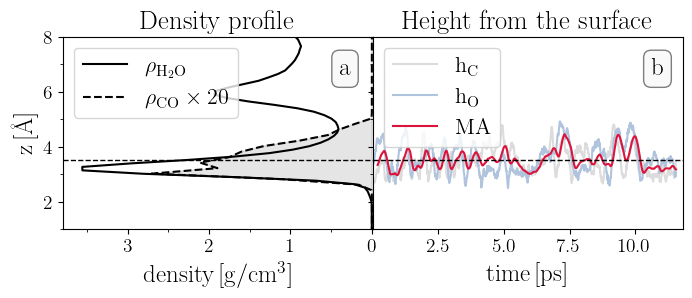

In [19]:
fig, ax = plt.subplots(ncols = 2, nrows=1, figsize = (8,2.5), sharex =False, sharey=True)
plt.subplots_adjust(wspace=0.0, hspace=0)
rcParams.update({'font.size': 16})
props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)
df_CO = pd.read_csv('gra_single_CO-H2/height_z_CO.csv', header=0 ).drop(columns="Unnamed: 0")
df_CO['z'] = df_CO['z']/1000
df_CO['mean'] = df_CO[['height C', 'height O']].mean(axis=1)
df_CO['MA'] = df_CO['mean'].rolling(window=200).mean()
df_H2 = pd.read_csv('gra_single_CO-H2/height_z_H2.csv', header=0 ).drop(columns="Unnamed: 0")
df_H2['z'] = df_H2['z']/1000
df_density_gra = pd.read_csv('density-profiles/films/gra_single/density.csv', header = 0, na_values = [np.nan, np.inf]).drop(columns="Unnamed: 0")
df_H2['mean'] = df_H2[['height H1', 'height H2']].mean(axis=1)
df_H2['MA'] = df_H2['mean'].rolling(window=200).mean()
ax[0].plot(df_density_gra['density'], df_density_gra['z'],color= 'black',label =r'$\mathrm{\rho_{H_2O}}$' )
ax[1].plot(df_CO['z'], df_CO['height C'], color='gainsboro',label = '$\mathrm{h_{C}}$')
ax[1].plot(df_CO['z'], df_CO['height O'], color='lightsteelblue',label = '$\mathrm{h_{O}}$')
ax[1].plot(df_CO['z'], df_CO['MA'], color='crimson',label = '$\mathrm{MA}$')
df_density_H2 = pd.read_csv('gra_single_CO-H2/density_z_H2.csv', header=0 ).drop(columns="Unnamed: 0")
df_density_H2['density H2'] = df_density_H2['density H2']*400
df_density_CO = pd.read_csv('gra_single_CO-H2/density_z_CO.csv', header=0 ).drop(columns="Unnamed: 0")
df_density_CO['density CO'] = df_density_CO['density CO']*20
ax[0].plot(df_density_CO['density CO'], df_density_CO['z'],color='black',ls='dashed',label=r'$\mathrm{\rho_{CO} \times 20}$' )
ax[0].fill_between(df_density_CO['density CO'],df_density_CO['z'], color='black', alpha=0.1 )
ax[1].axhline(y=df_CO['mean'].mean(), color='black', linestyle='dashed',lw=1, alpha=1)
ax[0].axhline(y=df_CO['mean'].mean(), color='black', linestyle='dashed',lw=1, alpha=1)
ax[1].set_xlabel(r'$\mathrm{time \hspace{0.1 cm}[ps]}$',fontsize=18)
ax[0].set_xlabel(r'$\mathrm{density\hspace{0.1 cm} [g/cm^3]}$',fontsize=18)
ax[0].set_ylabel(r'$\mathrm{z \hspace{0.1 cm}[\mbox{\normalfont\AA}]}$',fontsize=18)
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[0].set_title('$\mathrm{Density\hspace{0.2 cm} profile}$')
ax[1].set_title('$\mathrm{Height \hspace{0.2 cm} from\hspace{0.2 cm} the \hspace{0.2 cm} surface}$')
ax[0].yaxis.set_minor_locator(plt.MaxNLocator(8))
ax[0].xaxis.set_minor_locator(plt.MaxNLocator(8))
ax[0].axis([3.8, -0.01, 1,8])
ax[1].axis([0.01,11.800,1,8])
ax[0].legend(loc=2)
ax[1].legend(loc=2)
ax[0].text(0.4,6.6,'$\mathrm{a}$', fontsize = 18, bbox=props)
ax[1].text(10.6,6.6,'$\mathrm{b}$', fontsize = 18, bbox=props)

Text(0, 0.5, '$\\mathrm{E_{int}\\hspace{0.2cm}[meV]}$')

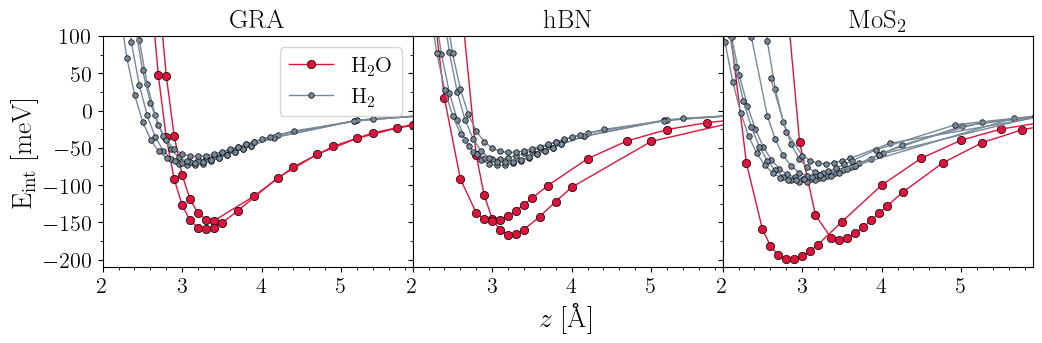

In [20]:
fig, ax = plt.subplots(figsize=(12,3), nrows=1, ncols=3, sharex=True, sharey=True)
mats=['gra_single','hbn_single', 'mos_single']
plt.subplots_adjust(wspace=0,hspace=0.25)
labels_h2o = ['$\mathrm{H_2O}$', '']
labels_h2 = ['$\mathrm{H_2}$', '', '', '','', '']
for one_m_idx,one_m in enumerate(mats):
    # choose water position
    if one_m == ('gra_single' or 'gra_bi' or 'hbn_gra' or 'mos_gra'):
        water_pos = ['1leg', '2leg']
    elif one_m == ('hbn_single' or 'hbn_bi' or 'gra_hbn' or 'mos_hbn'):
        water_pos = ['1N', '2B']
    elif one_m == ('mos_single' or 'mos_bi' or 'gra_mos' or 'hbn_mos'):
        water_pos = [ '1S','2Mo']
    # plotting   
    for w_idx, w in enumerate(water_pos):
        # df curves
        df =pd.read_csv('adsorption-h2o/{}/{}/curve.dat'.format(one_m, w),header=None,sep='\s+')
        z = df.iloc[:,0]
        energy = df.iloc[:,1]
        # curves
        curve_h2o, = ax[one_m_idx].plot(z, energy,color = 'crimson',marker='o',lw=1,alpha=1,markeredgecolor='k',markeredgewidth=0.5,label=labels_h2o[w_idx])
        ax[one_m_idx].set_xlim([2,10])
        ax[one_m_idx].set_ylim([-210,100])
        ax[one_m_idx].yaxis.set_major_locator(plt.MaxNLocator(7))
        ax[one_m_idx].xaxis.set_minor_locator(plt.MaxNLocator(20))
        ax[one_m_idx].yaxis.set_minor_locator(plt.MaxNLocator(13))
for one_m_idx,one_m in enumerate(mats):
    # choose water position
    if one_m == ('gra_single' or 'hbn_single'):
        water_pos = ['C', 'H3', 'B1', 'T4']
    elif one_m == ('mos_single' or 'mos_bi' or 'gra_mos' or 'hbn_mos'):
        water_pos = [ 'C', 'S', 'B1', 'T4', 'Mo', 'Mo2']
    # plotting   
    for w_idx, w in enumerate(water_pos):
        # df curves
        df =pd.read_csv('adsorption-h2/{}/curve{}.dat'.format(one_m, w),header=None,sep='\s+')
        z = df.iloc[:,0]
        energy = df.iloc[:,1]
        # curves
        curve_h2, = ax[one_m_idx].plot(z, energy,color = 'lightslategray',lw=1,alpha=1, ms=4, marker='o',markeredgecolor='k',markeredgewidth=0.5,label=labels_h2[w_idx])
        ax[one_m_idx].set_xlim([2,5.9])
        ax[one_m_idx].set_ylim([-210,100])
ax[0].legend([curve_h2o, curve_h2],['$\mathrm{H_2O}$','$\mathrm{H_2}$' ])
ax[0].set_title('$\mathrm{GRA}$')
ax[1].set_title('$\mathrm{hBN}$')
ax[2].set_title('$\mathrm{MoS_2}$')
ax[0].legend(loc=1)
ax[1].set_xlabel(r'$z\hspace{0.2cm}[\mathrm{\AA}]$',fontsize=20)
ax[0].set_ylabel(r'$\mathrm{E_{int}\hspace{0.2cm}[meV]}$',fontsize=20)

In [21]:
def force_sum(xyz, traj, top):
    fsum_liq= np.zeros((xyz.shape[0], xyz.shape[2]))
    fsum_sol = np.zeros((xyz.shape[0], xyz.shape[2]))
    for t in range(0,len(traj.time)):
        for n in range(top.n_atoms):
            atom = top.atom(n)
            if atom.name == "O" or atom.name == "H":
                fsum_liq[t] += xyz[t][n]
            else:
                fsum_sol[t]+= xyz[t][n]
    return fsum_liq**2, fsum_sol**2

def force_sum_all(xyz, traj, top):
    fsum = np.zeros((xyz.shape[0],xyz.shape[2]))
    for t in traj.time:
        fsum[t] = np.sum(xyz[t],axis=0)
    return fsum

def force_sum_all_com(xyz, traj, top):
    fsum = np.zeros((xyz.shape[0], xyz.shape[2]))
    for t in traj.time:
        com = md.compute_center_of_mass(traj[t]).flatten()
        fsum[t] = np.sum(xyz[t],axis=0) - com
    return fsum

def sem(arr2d):
    arr1d = arr2d.flatten()
    std_dev = np.std(arr1d)
    sample_size = arr1d.size
    sem = std_dev / np.sqrt(sample_size)
    return sem

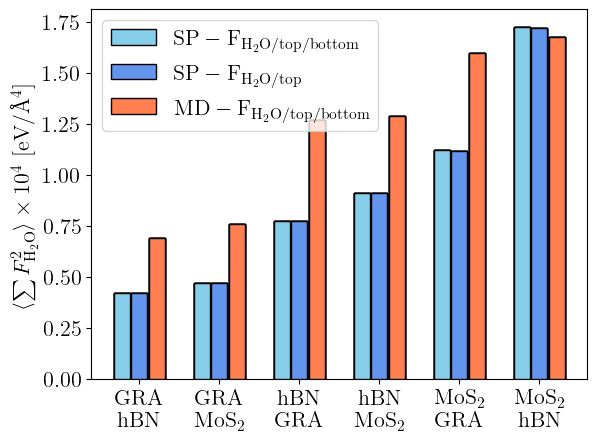

In [22]:
f_sum_all_liq =  pd.read_csv("force-screening/f_sum_all_liq.csv",sep=' ')
fig, ax = plt.subplots()
folds_force_screening = ['hbn_gra', 'mos_gra', 'gra_hbn', 'mos_hbn', 'gra_mos', 'hbn_mos']
labels_force_screening = ['bla', '$\mathrm{GRA}$\n$\mathrm{hBN}$', '$\mathrm{GRA}$\n$\mathrm{MoS_2}$',  '$\mathrm{hBN}$\n$\mathrm{GRA}$', '$\mathrm{hBN}$\n$\mathrm{MoS_2}$','$\mathrm{MoS_2}$\n$\mathrm{GRA}$','$\mathrm{MoS_2}$\n$\mathrm{hBN}$' ]

# Iterate over each material
for idx, (material, color) in enumerate(zip(folds_force_screening, colors)):
    f321 = f_sum_all_liq['Fxy_321'].values * 10000
    f32 = f_sum_all_liq['Fxy_32'].values * 10000
    f321_full_md = f_sum_all_liq['Fxy_321_full_md'].values * 10000
    x_spacing = np.arange(0,18,3)
    width = 0.6 #width
    rects1 = plt.bar(x_spacing - width/2-0.35,f321, width,color='skyblue', edgecolor='k',alpha=1, zorder=3)
    rects2 = plt.bar(x_spacing ,f32, width,color='cornflowerblue', edgecolor='k',alpha=1,  zorder=3)
    rects3 = plt.bar(x_spacing + width/2 + 0.35,f321_full_md, width,color='coral', edgecolor='k',alpha=1,  zorder=3)
plt.xticks(x_spacing, list(labels_force_screening[1:]))
ax.set_ylabel(r'$\langle\sum F^2_{\mathrm{H_2O}}\rangle\times 10^4\hspace{0.2cm}[\mathrm{eV/\AA^4}]$')
rects1.set_label('$\mathrm{SP-F_{H_2O/top/bottom}}$')
rects2.set_label('$\mathrm{SP-F_{H_2O/top}}$')
rects3.set_label('$\mathrm{MD-F_{H_2O/top/bottom}}$')
plt.legend(loc='best')